# Table of Contents
 
- [Problem Statement](#probstatement)
- [EDA & Imports](#edaimports)
- [Data Cleaning](#datacleaning) 
    - [Pre-Cleaning Steps](#precleaningsteps)
    - [Translating Values to Correct Datatype](#correctdatatype)
    - [Dropping Outliers](#outliers)
    - [Examining and Filling Empty Data](#fillnans)
    - [Examining and Dropping Collinear Features](#collinear)
    - [Creating New Features](#newfeatures)
- [Exploratory Visualizations](#visuals)
    - [Model 1 Visuals](#model1visuals)
    - [Model 2 Visuals](#model2visuals)
- [Pre-processing](#preprocess)
    - [Feature Selection Model 1](#featureselection1)
    - [Feature Selection Model 2](#featureselection2)
    - [Summary of Feature Selection](#featuresummary)
    - [Cleaning Test Dataframe and Reconciling Differences in Dummy Columns](#testclean)
    - [Train and Test Splits](#traintest)
- [Modelling](#modelling)
    - [Scaling](#scaling)
    - [Baseline](#baseline)
    - [Linear Regression](#linreg)
    - [Ridge Regression](#ridgereg)
    - [Lasso Regression](#lassoreg)
    - [Model Selection](#modelselect)
- [Feature Loadings](#featureload)
- [Conclusions & Recommendations](#conclusions)

# 1) Problem Statement <a id='probstatement'></a>

For firms and companies looking into investing in real estate, they typically take on two styles. Investing in the property value, looking at things such as land value, neighborhood, zoning type, building type or remodelling a poor quality house in terms of pocketing a profit. These two investment styles and methodologies are of different importance from city to city. For example, the square footage of a property in Manhattan is perhaps it's most important feature in determining it's sale price versus upstate rural New York where the architecture or overall quality of a home determines price. The problem we aim to solve here is to figure out which investment strategy is the best for properties in Ames, Iowa. This will help guide the decision for firms, based on their speciality, to decide if they should invest in Ames.

**Goal**: What our model will aim to do is see which features cateogorized into investment styles can most accurately predict house prices. 

**Model 1**: Aims to predict the price of a house using features that cannot be changed/modified such as neighborhood, square footage, house style, etc.

**Model 2**: Aims to see how features that can be added or upgraded within a house affect the price of the house such as having a fence, kitchen quality, garage condition, etc.

These models will tell us what investment strategy to take on. Focusing on more general parameters such as model 1 that don't require as much involvement or the rennovation route where the focus will be on construction and remodelling. The logic is that you want to focus on variables that are directly correlated with price, you don't want to direct your investment research into parameters that don't matter.

**Evaluating Models**: The better model will be able to better predict the price of a home based on several statistical metrics which will be presented below. This means that the combination factors from said model have more weight on the price of a home and should therefore be taken into consideration more for investments.

# 2) EDA & Imports <a id='edaimports'></a>

In [1]:
#Imports for the remainder of the notebook

import pandas as pd
import numpy as np
import sklearn
import scipy as sp
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.dummy import DummyRegressor
%matplotlib inline


In [2]:
df_train = pd.read_csv("datasets/train.csv")
df_test = pd.read_csv("datasets/test.csv")

**Citation**: For EDA functions I wanted to view all rows instead of having to keep individually checking columns for their null values, data types, etc. https://stackoverflow.com/questions/23168416/pandas-printing-all-dtypes

In [3]:
pd.options.display.max_rows = 4000

In [4]:
df_train.head()

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
0  109  533352170           60        RL           NaN     13517   Pave   NaN   
1  544  531379050           60        RL          43.0     11492   Pave   NaN   
2  153  535304180           20        RL          68.0      7922   Pave   NaN   
3  318  916386060           60        RL          73.0      9802   Pave   NaN   
4  255  906425045           50        RL          82.0     14235   Pave   NaN   

  Lot Shape Land Contour  ... Screen Porch Pool Area Pool QC Fence  \
0       IR1          Lvl  ...            0         0     NaN   NaN   
1       IR1          Lvl  ...            0         0     NaN   NaN   
2       Reg          Lvl  ...            0         0     NaN   NaN   
3       Reg          Lvl  ...            0         0     NaN   NaN   
4       IR1          Lvl  ...            0         0     NaN   NaN   

  Misc Feature Misc Val Mo Sold Yr Sold  Sale Type  SalePrice  
0          NaN        0       3    2010        WD      130500  
1          NaN        0       4    2009        WD      220000  
2          NaN        0       1    2010        WD      109000  
3          NaN        0       4    2010        WD      174000  
4          NaN        0       3    2010        WD      138500  

[5 rows x 81 columns]

In [5]:
df_train.shape

(2051, 81)

In [6]:
df_test.shape

(878, 80)

In [7]:
#Viewing all the columns or possible features in our train set

set(df_train)

{'1st Flr SF',
 '2nd Flr SF',
 '3Ssn Porch',
 'Alley',
 'Bedroom AbvGr',
 'Bldg Type',
 'Bsmt Cond',
 'Bsmt Exposure',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Bsmt Qual',
 'Bsmt Unf SF',
 'BsmtFin SF 1',
 'BsmtFin SF 2',
 'BsmtFin Type 1',
 'BsmtFin Type 2',
 'Central Air',
 'Condition 1',
 'Condition 2',
 'Electrical',
 'Enclosed Porch',
 'Exter Cond',
 'Exter Qual',
 'Exterior 1st',
 'Exterior 2nd',
 'Fence',
 'Fireplace Qu',
 'Fireplaces',
 'Foundation',
 'Full Bath',
 'Functional',
 'Garage Area',
 'Garage Cars',
 'Garage Cond',
 'Garage Finish',
 'Garage Qual',
 'Garage Type',
 'Garage Yr Blt',
 'Gr Liv Area',
 'Half Bath',
 'Heating',
 'Heating QC',
 'House Style',
 'Id',
 'Kitchen AbvGr',
 'Kitchen Qual',
 'Land Contour',
 'Land Slope',
 'Lot Area',
 'Lot Config',
 'Lot Frontage',
 'Lot Shape',
 'Low Qual Fin SF',
 'MS SubClass',
 'MS Zoning',
 'Mas Vnr Area',
 'Mas Vnr Type',
 'Misc Feature',
 'Misc Val',
 'Mo Sold',
 'Neighborhood',
 'Open Porch SF',
 'Overall Cond',
 'Overall

In [8]:
# Checking the differences between dataframes.

set(df_train) - set(df_test)

{'SalePrice'}

**Comment**: Using our data dictionary we are checking to make sure dtype matches expected data type, numerical (int/float) vs object (categorical). This is the first step before investigating the numerical columns.

**List of columns that do not match expected data type**:

In [9]:
#Displaying all data types for future reference when selecting features/dummifying.

df_train.dtypes

Id                   int64
PID                  int64
MS SubClass          int64
MS Zoning           object
Lot Frontage       float64
Lot Area             int64
Street              object
Alley               object
Lot Shape           object
Land Contour        object
Utilities           object
Lot Config          object
Land Slope          object
Neighborhood        object
Condition 1         object
Condition 2         object
Bldg Type           object
House Style         object
Overall Qual         int64
Overall Cond         int64
Year Built           int64
Year Remod/Add       int64
Roof Style          object
Roof Matl           object
Exterior 1st        object
Exterior 2nd        object
Mas Vnr Type        object
Mas Vnr Area       float64
Exter Qual          object
Exter Cond          object
Foundation          object
Bsmt Qual           object
Bsmt Cond           object
Bsmt Exposure       object
BsmtFin Type 1      object
BsmtFin SF 1       float64
BsmtFin Type 2      object
B

**Comment**: Using the data dictionary to verify that the ranges and means are reasonable.

**Notes on which numerical categories need to be cleaned**:
- Garage year built needs to be fixed if used because max year is 2207. 
- Lot area max might be out of range, will examine further.

In [10]:
df_train.describe().T

count          mean           std          min          25%  \
Id               2051.0  1.474034e+03  8.439808e+02          1.0        753.5   
PID              2051.0  7.135900e+08  1.886918e+08  526301100.0  528458140.0   
MS SubClass      2051.0  5.700878e+01  4.282422e+01         20.0         20.0   
Lot Frontage     1721.0  6.905520e+01  2.326065e+01         21.0         58.0   
Lot Area         2051.0  1.006521e+04  6.742489e+03       1300.0       7500.0   
Overall Qual     2051.0  6.112140e+00  1.426271e+00          1.0          5.0   
Overall Cond     2051.0  5.562165e+00  1.104497e+00          1.0          5.0   
Year Built       2051.0  1.971709e+03  3.017789e+01       1872.0       1953.5   
Year Remod/Add   2051.0  1.984190e+03  2.103625e+01       1950.0       1964.5   
Mas Vnr Area     2029.0  9.969591e+01  1.749631e+02          0.0          0.0   
BsmtFin SF 1     2050.0  4.423005e+02  4.612041e+02          0.0          0.0   
BsmtFin SF 2     2050.0  4.795902e+01  1.650009e+02          0.0          0.0   
Bsmt Unf SF      2050.0  5.677283e+02  4.449548e+02          0.0        220.0   
Total Bsmt SF    2050.0  1.057988e+03  4.494107e+02          0.0        793.0   
1st Flr SF       2051.0  1.164488e+03  3.964469e+02        334.0        879.5   
2nd Flr SF       2051.0  3.293291e+02  4.256710e+02          0.0          0.0   
Low Qual Fin SF  2051.0  5.512921e+00  5.106887e+01          0.0          0.0   
Gr Liv Area      2051.0  1.499330e+03  5.004478e+02        334.0       1129.0   
Bsmt Full Bath   2049.0  4.275256e-01  5.226732e-01          0.0          0.0   
Bsmt Half Bath   2049.0  6.344558e-02  2.517052e-01          0.0          0.0   
Full Bath        2051.0  1.577279e+00  5.492794e-01          0.0          1.0   
Half Bath        2051.0  3.710385e-01  5.010427e-01          0.0          0.0   
Bedroom AbvGr    2051.0  2.843491e+00  8.266183e-01          0.0          2.0   
Kitchen AbvGr    2051.0  1.042906e+00  2.097900e-01          0.0          1.0   
TotRms AbvGrd    2051.0  6.435885e+00  1.560225e+00          2.0          5.0   
Fireplaces       2051.0  5.909313e-01  6.385163e-01          0.0          0.0   
Garage Yr Blt    1937.0  1.978708e+03  2.544109e+01       1895.0       1961.0   
Garage Cars      2050.0  1.776585e+00  7.645374e-01          0.0          1.0   
Garage Area      2050.0  4.736717e+02  2.159346e+02          0.0        319.0   
Wood Deck SF     2051.0  9.383374e+01  1.285494e+02          0.0          0.0   
Open Porch SF    2051.0  4.755680e+01  6.674724e+01          0.0          0.0   
Enclosed Porch   2051.0  2.257192e+01  5.984511e+01          0.0          0.0   
3Ssn Porch       2051.0  2.591419e+00  2.522961e+01          0.0          0.0   
Screen Porch     2051.0  1.651146e+01  5.737420e+01          0.0          0.0   
Pool Area        2051.0  2.397855e+00  3.778257e+01          0.0          0.0   
Misc Val         2051.0  5.157435e+01  5.733940e+02          0.0          0.0   
Mo Sold          2051.0  6.219893e+00  2.744736e+00          1.0          4.0   
Yr Sold          2051.0  2.007776e+03  1.312014e+00       2006.0       2007.0   
SalePrice        2051.0  1.814697e+05  7.925866e+04      12789.0     129825.0   

                         50%           75%          max  
Id                    1486.0  2.198000e+03       2930.0  
PID              535453200.0  9.071801e+08  924152030.0  
MS SubClass             50.0  7.000000e+01        190.0  
Lot Frontage            68.0  8.000000e+01        313.0  
Lot Area              9430.0  1.151350e+04     159000.0  
Overall Qual             6.0  7.000000e+00         10.0  
Overall Cond             5.0  6.000000e+00          9.0  
Year Built            1974.0  2.001000e+03       2010.0  
Year Remod/Add        1993.0  2.004000e+03       2010.0  
Mas Vnr Area             0.0  1.610000e+02       1600.0  
BsmtFin SF 1           368.0  7.337500e+02       5644.0  
BsmtFin SF 2             0.0  0.000000e+00       1474.0  
Bsmt Unf SF            

In [11]:
df_train.isnull().sum()

Id                    0
PID                   0
MS SubClass           0
MS Zoning             0
Lot Frontage        330
Lot Area              0
Street                0
Alley              1911
Lot Shape             0
Land Contour          0
Utilities             0
Lot Config            0
Land Slope            0
Neighborhood          0
Condition 1           0
Condition 2           0
Bldg Type             0
House Style           0
Overall Qual          0
Overall Cond          0
Year Built            0
Year Remod/Add        0
Roof Style            0
Roof Matl             0
Exterior 1st          0
Exterior 2nd          0
Mas Vnr Type         22
Mas Vnr Area         22
Exter Qual            0
Exter Cond            0
Foundation            0
Bsmt Qual            55
Bsmt Cond            55
Bsmt Exposure        58
BsmtFin Type 1       55
BsmtFin SF 1          1
BsmtFin Type 2       56
BsmtFin SF 2          1
Bsmt Unf SF           1
Total Bsmt SF         1
Heating               0
Heating QC      

**Comments**: Pool QC, Fence, Misc Feature, Fireplace Qu, Garage Type/Blt/Finish/Qual/Cond, and Bsmt features have the most nulls. Most likely means these houses don't have these features and we can fill with 0 or NA based on if they are numerical or categorical.

In [12]:
# Creating a list of columns for which there are null values. 

empty = [x for x in df_train.columns if df_train[x].isnull().sum() > 0]
print(empty)

['Lot Frontage', 'Alley', 'Mas Vnr Type', 'Mas Vnr Area', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars', 'Garage Area', 'Garage Qual', 'Garage Cond', 'Pool QC', 'Fence', 'Misc Feature']


## EDA Findings:  <a id='edafindings'></a>

- There are several columns which should be continuous/discrete instead of ordinal strings. It makes no sense to make these dummies as these nominal values represent numerical values.
- The opposite is true for MS SubClass it is a number that represents something nominal.
- Most of the null values are additional features of a house, such as pools, fences, fireplaces, or basements. For the purpose of our regression we can assign these 0 if they are continuous or discrete and NA or none if they are categorical. 

# 3) Data Cleaning <a id='datacleaning'></a>

**Methodology**: Here we had to convert ordinal column string values to numeric values and some numeric columns to categorical string values. Then we had to decide how to fill our nan values.

Citation for Replacing: https://stackoverflow.com/questions/45416684/python-pandas-replace-multiple-columns-zero-to-nan

## Pre-Cleaning Steps <a id='precleaningsteps'></a>

In [13]:
df_train.set_index('Id', inplace = True)

In [14]:
df_test.set_index('Id', inplace = True)

### Checking Unique Values of Ordinal Categories Before Making Numeric

We need to make sure that the unique values for the to be converted columns are as expected otherwise we might not end up converting all the values and end up with a column that is part object and part integer.

In [15]:
#Function that prints all unique values for ordinal columns within the ames dataframe

def checkvalues(dataframe):
    ord_list = ['Exter Qual', 'Exter Cond', 'Bsmt Qual', 'Bsmt Cond', 'Heating QC', 
           'Kitchen Qual', 'Fireplace Qu', 'Garage Qual', 'Garage Cond', 'Pool QC',
            'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Functional',
            'Garage Finish', 'Fence', 'MS SubClass', 'Utilities']
    for x in ord_list:
        print(dataframe[x].unique())

In [16]:
checkvalues(df_train)

['Gd' 'TA' 'Ex' 'Fa']
['TA' 'Gd' 'Fa' 'Ex' 'Po']
['TA' 'Gd' 'Fa' nan 'Ex' 'Po']
['TA' 'Gd' nan 'Fa' 'Po' 'Ex']
['Ex' 'TA' 'Gd' 'Fa' 'Po']
['Gd' 'TA' 'Fa' 'Ex']
[nan 'TA' 'Gd' 'Po' 'Ex' 'Fa']
['TA' 'Fa' nan 'Gd' 'Ex' 'Po']
['TA' 'Fa' nan 'Po' 'Gd' 'Ex']
[nan 'Fa' 'Gd' 'Ex' 'TA']
['No' 'Gd' 'Av' nan 'Mn']
['GLQ' 'Unf' 'ALQ' 'Rec' nan 'BLQ' 'LwQ']
['Unf' 'Rec' nan 'BLQ' 'GLQ' 'LwQ' 'ALQ']
['Typ' 'Mod' 'Min2' 'Maj1' 'Min1' 'Sev' 'Sal' 'Maj2']
['RFn' 'Unf' 'Fin' nan]
[nan 'MnPrv' 'GdPrv' 'GdWo' 'MnWw']
[ 60  20  50 180 160  70 120 190  85  30  90  80  75  45  40 150]
['AllPub' 'NoSeWa' 'NoSewr']


**Comments**: These columns unique values are as expected we can move on to assigning them numeric values.

## Cleaning Part 1 : Translating Values to Correct Datatype <a id='correctdatatype'></a>

**Type 1 (Ordinal to Continous/Discrete)**: For ordinal columns we assign them an arbitrary rank depending on how we want to weight the highest rank vs the lowest rank.


**Columns using Ex, Gd, TA, Fa, Po, NA (1-5)**: 

**Note**: Na values will be filled for all columns in a separate function.

- Exter Qual & Exter Cond
- Bsmt Qual & Bsmt Cond
- Heating QC, Kitchen Qual, & Fireplace Qu
- Garage Qual & Garage Cond
- Pool QC


**Columns using unique values**: 
- Bsmt Exposure
- BsmitFin Type 1/2
- Functional
- Garage Finish
- Fence


**Type 2 Conversions**: For discrete columns that should be categorical we assign them strings which can later be dummified. 

**Columns**: MS SubClass

In [17]:
def conversions(dataframe):
    
    # Columns using same scale
    
    conv1 = ['Exter Qual', 'Exter Cond', 'Bsmt Qual', 'Bsmt Cond', 'Heating QC', 
           'Kitchen Qual', 'Fireplace Qu', 'Garage Qual', 'Garage Cond', 'Pool QC']
    value_dict1 = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1}
    dataframe[conv1] = dataframe[conv1].replace(value_dict1)
    
    #Unique scale conversions
    
    conv2 = ['Bsmt Exposure']
    value_dict2 = {'No': 1, 'Mn': 2, 'Av': 3, 'Gd' :4 }
    dataframe[conv2] = dataframe[conv2].replace(value_dict2)

    conv3 = ['BsmtFin Type 1', 'BsmtFin Type 2']
    value_dict3 = {'GLQ': 6 ,'Unf': 1 ,'ALQ': 5 , 'Rec':3,'BLQ':4 , 'LwQ':2}
    dataframe[conv3] = dataframe[conv3].replace(value_dict3)

    conv4 = ['Functional']
    value_dict4 = {'Typ': 7, 'Min1' : 6 , 'Min2' : 5, 'Mod' : 4, 'Maj1' : 3, 'Maj2' : 2,
              'Sev' : 1, 'Sal' : 0}
    dataframe[conv4] = dataframe[conv4].replace(value_dict4)
    
    conv5 = ['Garage Finish']
    value_dict5 = {'Fin': 3 , 'RFn' : 2 , 'Unf': 1}
    dataframe[conv5] = dataframe[conv5].replace(value_dict5)
    
    conv6 = ['Fence']
    value_dict6 = {'GdPrv' : 4 , 'MnPrv' : 3 , 'GdWo' : 2 , 'MnWw' : 1}
    dataframe[conv6] = dataframe[conv6].replace(value_dict6)
    
    conv7 = ['Utilities']
    value_dict7 = {'AllPub' : 4 , 'NoSewr' : 3 , 'NoSeWa' : 2 , 'ELO' : 1}
    dataframe[conv7] = dataframe[conv7].replace(value_dict7)
    
    
    
    #Type 2 conversions
    conv8 = ['MS SubClass']
    value_dict8 = {20 : '1-Story 1946 & Newer All Styles' , 
               30 : '1-STORY 1945 & OLDER' , 40 : '1-STORY W/ FINISHED ATTIC ALL AGES' ,
               45 : '1-1/2 STORY - UNFINISHED ALL AGES' , 
               50 : '1-1/2 Story Finished All Ages' , 60:'2-Stpry 1946 & Newer', 
               70 : '2-STORY 1945 & OLDER' ,  75 : '2-1/2 STORY ALL AGES' ,  
               80 : 'SPLIT OR MULTI-LEVEL' , 85 : 'SPLIT FOYER' , 
               90 : 'DUPLEX - ALL STYLES AND AGES' ,
               120 : '1-STORY PUD - 1946 & NEWER' , 
               150 : '1-1/2 STORY PUD - ALL AGES', 160 : '2-STORY PUD - 1946 & Newer' , 
               180 : 'Pud - Multilevel -Incl Split Lev/Foyer', 
               190 : '2 FAMILY CONVERSION - ALL STYLES AND AGES' }
    dataframe[conv8] = dataframe[conv8].replace(value_dict8)

In [18]:
conversions(df_train)

## Cleaning Part 2: Dropping Outliers from Numerical Columns <a id='outliers'></a>

From our EDA we saw that
- Year from Garage Year Built is an outlier at 2207. 
- Lot Area Max is unreasonable at 159,000 square feet.

- We will remove rows where the year is > 2010
- We will remove rows were lot area is > 10,000 as these are Mansions and likely didn't sell for the max price of $600,000 based on my own research into Ames housing.
- This removed quite a bit of data, approximately 900 rows of data. An alternative would be to divide houses with lot areas over a certain value however that means we are then assuming what the error was or if it was even an error. This also does not work well. Lets say we choose to scale down values over 9000, then those houses will be scaled down but then not houses that have 9,000 square feet which are also probably errors, how small do we go before we compromise the accuracy of our data? We made the decision to leave those data points out.

In [19]:
def outliers(dataframe):
    dataframe.drop(dataframe[dataframe['Garage Yr Blt'] >= 2011].index , inplace=True)
    dataframe.drop(dataframe[dataframe['Lot Area'] >= 10_000].index , inplace=True)

In [20]:
df_train.shape

(2051, 80)

In [21]:
outliers(df_train)

In [22]:
#Checking our new max values for Garage Yr Blt and Lot Area
df_train.describe().T

count          mean           std          min  \
PID              1195.0  7.247955e+08  1.883602e+08  527105050.0   
Lot Frontage     1044.0  6.047701e+01  1.743946e+01         21.0   
Lot Area         1195.0  7.237680e+03  2.226244e+03       1300.0   
Overall Qual     1195.0  5.858577e+00  1.276347e+00          1.0   
Overall Cond     1195.0  5.609205e+00  1.154156e+00          1.0   
Year Built       1195.0  1.968298e+03  3.122823e+01       1872.0   
Year Remod/Add   1195.0  1.981968e+03  2.182849e+01       1950.0   
Mas Vnr Area     1185.0  6.788608e+01  1.393022e+02          0.0   
Exter Qual       1195.0  3.327197e+00  5.344624e-01          2.0   
Exter Cond       1195.0  3.084519e+00  3.822524e-01          1.0   
Bsmt Qual        1163.0  3.473775e+00  6.572449e-01          1.0   
Bsmt Cond        1163.0  2.996561e+00  3.104411e-01          1.0   
Bsmt Exposure    1162.0  1.496558e+00  9.161609e-01          1.0   
BsmtFin Type 1   1163.0  3.519347e+00  2.075659e+00          1.0   
BsmtFin SF 1     1194.0  3.659430e+02  3.772076e+02          0.0   
BsmtFin Type 2   1163.0  1.276010e+00  8.733976e-01          1.0   
BsmtFin SF 2     1194.0  3.828811e+01  1.410866e+02          0.0   
Bsmt Unf SF      1194.0  5.420737e+02  4.080811e+02          0.0   
Total Bsmt SF    1194.0  9.463049e+02  3.510829e+02          0.0   
Heating QC       1195.0  4.086192e+00  9.711596e-01          1.0   
1st Flr SF       1195.0  1.038565e+03  3.007851e+02        334.0   
2nd Flr SF       1195.0  2.990477e+02  3.819254e+02          0.0   
Low Qual Fin SF  1195.0  4.602510e+00  4.294929e+01          0.0   
Gr Liv Area      1195.0  1.342215e+03  3.819217e+02        334.0   
Bsmt Full Bath   1194.0  3.760469e-01  5.015942e-01          0.0   
Bsmt Half Bath   1194.0  6.532663e-02  2.571762e-01          0.0   
Full Bath        1195.0  1.482008e+00  5.212110e-01          0.0   
Half Bath        1195.0  3.196653e-01  4.806889e-01          0.0   
Bedroom AbvGr    1195.0  2.719665e+00  7.878303e-01          0.0   
Kitchen AbvGr    1195.0  1.047699e+00  2.246926e-01          0.0   
Kitchen Qual     1195.0  3.417573e+00  6.061045e-01          2.0   
TotRms AbvGrd    1195.0  6.039331e+00  1.350337e+00          2.0   
Functional       1195.0  6.890377e+00  5.616434e-01          1.0   
Fireplaces       1195.0  4.359833e-01  5.743343e-01          0.0   
Fireplace Qu      472.0  3.394068e+00  7.990219e-01          1.0   
Garage Yr Blt    1102.0  1.976407e+03  2.625602e+01       1895.0   
Garage Finish    1102.0  1.725953e+00  8.003393e-01          1.0   
Garage Cars      1194.0  1.577052e+00  7.263518e-01          0.0   
Garage Area      1194.0  4.128459e+02  1.947263e+02          0.0   
Garage Qual      1102.0  2.955535e+00  2.709375e-01          1.0   
Garage Cond      1102.0  2.972777e+00  2.542702e-01          1.0   
Wood Deck SF     1195.0  7.694561e+01  1.110856e+02          0.0   
Open Porch SF    1195.0  3.800000e+01  5.730557e+01          0.0   
Enclosed Porch   1195.0  2.294895e+01  5.818524e+01          0.0   
3Ssn Porch       1195.0  1.582427e+00  1.536934e+01          0.0   
Screen Porch     1195.0  1.139331e+01  4.557776e+01          0.0   
Pool Area        1195.0  7.899582e-01  1.976525e+01          0.0   
Pool QC             2.0  3.500000e+00  7.071068e-01          3.0   
Fence             257.0  2.957198e+00  7.085669e-01          1.0   
Misc Val         1195.0  2.613305e+01  2.447818e+02          0.0   
Mo Sold          1195.0  6.254393e+00  2.702543e+00          1.0   
Yr Sold          1195.0  2.007771e+03  1.312603e+00       2006.0   
SalePrice        1195.0  1.557185e+05  5.505664e+04      12789.0   

                          25%          50%           75%          max  
PID              5.323541e+08  902106140.0  9.072007e+08  924151050.0  
Lot Frontage     5.000000e+01         61.0  7.100000e+01        153.0  
Lot Area         6.000000e+03       7898.0  8.980000e+03       9991.0  
Overall Qual     5.000000e+00          6.0  7.000000e+00 

In [23]:
df_train.shape

(1195, 80)

## Cleaning Part 3: Examining and Filling Empty Data <a id='fillnans'></a>


**Handling Ordinal Numeric Values** : The bulk of our nans were features that were considered 'extra' for the house such as a pool or fence. Filling these nans with 0 is the appropriate move because it is simply saying that we do not have this feature, which does in fact have an effect on the price of a house. This does not work for 'Functional' as there are no nans present and they already have a string assigned for 0. 

 **Other Null Columns**
 
- **Alley** : Replace na with 'No Alley' per dictionary
- **Lot Frontage** : Replaced with 0, assuming Na values means no street connected to property.
- **Mas Vnr Type** : Assigned na to 'None' per dictionary
- **Mas Vnr Area** : Assigned 0 since not all houses have this, most likely why it is missing.
- **Garage Type and Garage Finish**: Assigned 'No Garage' per dictionary
- **Misc Feature**: Assigned 'None' per dictionary
- **Garage Year Built**: Is unusual to handle because saying it was built year 0 is false, it most likely means it was never built. To avoid having a significant impact on our data I have decided to assign it the average value of Garage Year Built. Shouldn't have too big of an impact on our data because the number of nans is fairly small.
- **Year Built**, **Heating QC**, **Lot Area**, **Lot Frontage**,: Were all filled with their means because these rows cannot be 0 since they are qualities every house possesses.

Citation for filling a nan with a mean: 

https://stackoverflow.com/questions/18689823/pandas-dataframe-replace-nan-values-with-average-of-columns


**Remainder/Leftovers**

The remaining nulls are numerical columns and by examining them, we can assume that a nan means that it doesn't have the feature so they will be filled with zeros.


In [24]:
df_train.isnull().sum()

PID                   0
MS SubClass           0
MS Zoning             0
Lot Frontage        151
Lot Area              0
Street                0
Alley              1095
Lot Shape             0
Land Contour          0
Utilities             0
Lot Config            0
Land Slope            0
Neighborhood          0
Condition 1           0
Condition 2           0
Bldg Type             0
House Style           0
Overall Qual          0
Overall Cond          0
Year Built            0
Year Remod/Add        0
Roof Style            0
Roof Matl             0
Exterior 1st          0
Exterior 2nd          0
Mas Vnr Type         10
Mas Vnr Area         10
Exter Qual            0
Exter Cond            0
Foundation            0
Bsmt Qual            32
Bsmt Cond            32
Bsmt Exposure        33
BsmtFin Type 1       32
BsmtFin SF 1          1
BsmtFin Type 2       32
BsmtFin SF 2          1
Bsmt Unf SF           1
Total Bsmt SF         1
Heating               0
Heating QC            0
Central Air     

In [25]:
#This function allows us to assign the nans for ordinal columns in ames data as 0.

def fillna(dataframe):

    zerocolumns = ['Exter Qual', 'Exter Cond', 'Bsmt Qual', 'Bsmt Cond', 'Heating QC', 
           'Kitchen Qual', 'Fireplace Qu', 'Garage Qual', 'Garage Cond', 'Pool QC', 
              'Fence', 'BsmtFin Type 1', 'BsmtFin Type 2',
              'Bsmt Exposure', 'Utilities', 'Mas Vnr Area', 'BsmtFin SF 1', 
                   'BsmtFin SF 2', 'Bsmt Unf SF','Total Bsmt SF', 'Bsmt Full Bath',
                  'Bsmt Half Bath', 'Garage Cars', 'Garage Area']
    dataframe[zerocolumns] = dataframe[zerocolumns].fillna(0, inplace = False)
    
    
    #Takes miscillaneous null columns and fills them with inputed characters.


    dataframe['Alley'] = dataframe['Alley'].fillna('No Alley', inplace = False)
    dataframe['Lot Frontage'] = dataframe['Lot Frontage'].fillna('1', inplace = False)
    dataframe['Mas Vnr Type'] = dataframe['Mas Vnr Type'].fillna('None', inplace = False)
    dataframe['Mas Vnr Area'] = dataframe['Mas Vnr Area'].fillna('1', inplace = False)
    dataframe['Garage Type'] = dataframe['Garage Type'].fillna('None', inplace = False)
    dataframe['Garage Finish'] = dataframe['Garage Finish'].fillna('None', inplace = False)
    dataframe['Misc Feature'] = dataframe['Misc Feature'].fillna('None', inplace = False)
    dataframe['Garage Yr Blt'].fillna((dataframe['Garage Yr Blt'].mean()), inplace=True)
    dataframe['Lot Area'].fillna((dataframe['Lot Area'].mean()), inplace=True)

    
    
   
    #Takes the leftover numerical columns and fills them with 0 if we missed any.

                                                           

In [26]:
fillna(df_train)

In [27]:
#checking to make sure there are no nulls left

df_train.isnull().sum()

PID                0
MS SubClass        0
MS Zoning          0
Lot Frontage       0
Lot Area           0
Street             0
Alley              0
Lot Shape          0
Land Contour       0
Utilities          0
Lot Config         0
Land Slope         0
Neighborhood       0
Condition 1        0
Condition 2        0
Bldg Type          0
House Style        0
Overall Qual       0
Overall Cond       0
Year Built         0
Year Remod/Add     0
Roof Style         0
Roof Matl          0
Exterior 1st       0
Exterior 2nd       0
Mas Vnr Type       0
Mas Vnr Area       0
Exter Qual         0
Exter Cond         0
Foundation         0
Bsmt Qual          0
Bsmt Cond          0
Bsmt Exposure      0
BsmtFin Type 1     0
BsmtFin SF 1       0
BsmtFin Type 2     0
BsmtFin SF 2       0
Bsmt Unf SF        0
Total Bsmt SF      0
Heating            0
Heating QC         0
Central Air        0
Electrical         0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area        0
Bsmt Full Bat

In [28]:
#Checking to make sure data types are as expected before combining and dropping
df_train.dtypes

PID                  int64
MS SubClass         object
MS Zoning           object
Lot Frontage        object
Lot Area             int64
Street              object
Alley               object
Lot Shape           object
Land Contour        object
Utilities            int64
Lot Config          object
Land Slope          object
Neighborhood        object
Condition 1         object
Condition 2         object
Bldg Type           object
House Style         object
Overall Qual         int64
Overall Cond         int64
Year Built           int64
Year Remod/Add       int64
Roof Style          object
Roof Matl           object
Exterior 1st        object
Exterior 2nd        object
Mas Vnr Type        object
Mas Vnr Area       float64
Exter Qual           int64
Exter Cond           int64
Foundation          object
Bsmt Qual          float64
Bsmt Cond          float64
Bsmt Exposure      float64
BsmtFin Type 1     float64
BsmtFin SF 1       float64
BsmtFin Type 2     float64
BsmtFin SF 2       float64
B

## Cleaning Part 4 Examining and Dropping Collinear Features <a id='collinear'></a> 

To do this we passed a method to sort values showing us the 10 most correlated features. Suprisingly Bsmt Qual/Cond, ExterQual/Cond, and Overall Qual/Cond were not highly correlated.

Citation on how to use unstack method: https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas/51071640

In [29]:
#Showing top positive correlations
df_train.corr().unstack().sort_values().drop_duplicates().tail(n=10)

Gr Liv Area    TotRms AbvGrd    0.768822
SalePrice      Overall Qual     0.778198
Garage Yr Blt  Year Built       0.783558
1st Flr SF     Total Bsmt SF    0.791758
Garage Area    Garage Cars      0.885283
Fireplace Qu   Fireplaces       0.899427
Garage Cond    Garage Qual      0.957387
Pool Area      Pool QC          0.997186
PID            PID              1.000000
               Utilities             NaN
dtype: float64

In [30]:
#Showing top negative correlations
df_train.corr().unstack().sort_values().drop_duplicates().head(n=10)

Bsmt Unf SF     BsmtFin SF 1     -0.560636
Enclosed Porch  Year Built       -0.445630
1st Flr SF      2nd Flr SF       -0.395885
Bsmt Full Bath  Bsmt Unf SF      -0.394394
PID             Year Built       -0.391078
Bsmt Unf SF     BsmtFin Type 1   -0.385177
Overall Cond    Year Built       -0.351018
Enclosed Porch  Garage Yr Blt    -0.327542
Kitchen AbvGr   Bsmt Cond        -0.326915
Total Bsmt SF   2nd Flr SF       -0.326614
dtype: float64

In [31]:
#Dropping Collinear features that are roughly > = .90

def droppedcol(dataframe):
    dataframe.drop(['Garage Area', 'Fireplace Qu', 'Pool Area'], axis=1, inplace=True)

In [32]:
droppedcol(df_train)

## Cleaning Part 5: Creating New Features <a id='newfeature'></a>

**Methodology**: For Model 2 we decided to create combination terms acting as a 'score' for a category. 
 
Example: 'Garage Score' = 'Garage Cars' + 'Garage Area' + 'Garage Cond' + 'Garage Qual'

This allows our model to be cleaner but to also allow investors to look at the features of a house holistically. It's somewhat redunant to have these categories as individual coeffecients. We can infer that a garage that has better condition, quality, area, and car space will increase the value of a house. This also makes it easy to explain to investors and stakeholders our findings. Instead we can say "the garage is an important factor for house prices" instead of saying "garage quality is this important, area is a little less important, and the amount of cars it can hold is the most important." 

**Why Combination Features?**:

The reason we use combination features instead of interaction is because many of these categories have been assigned 0's in place of their Nan values because they do not possess that feature. Instead we have a total score whereby the score can only go up with additional features, quality of these features, or square footage of those features. We don't penalize the whole feature because they are lacking a feature. In addition, this makes logistical sense for our model. If we were to assign numbers > 0 for things such as pool quality when no pool exists we are thereby saying that a house whose pool quality is 2 has 2 times better pool quality of a house without pools, which doesn't make sense. The same goes for features tracking amounts, a house with 3 fireplaces does not have 3 times the fireplaces of a house with no fireplaces, but it does have 3 MORE; we cannot just assign those Nans a value of 1 or any other arbitrary number because they represent 0 per the data dictionary.


## Combination Features

- porchdeck_score = (Wood Deck SF + Open Porch SF + Enclosed Porch + 3Ssn Porch + Screen Porch ) / 100

**Explanation**: Gives a 'score' based on how much square footage of porch or deck a house has, then scaled down.

- garage_score = Garage Qual + Garage Cars + Garage Cond

**Note**: Left out garage area because usually that's something that isn't renovated.

**Explanation**: Scores a garage based on quality, condition, and cars it can fit.

- bsmt_score = Bsmt Qual + Bsmt Cond + Bsmt Exposure 

**Explanation**: Scores a basement based on quality, condition and exposure.


- funct_score = Functional + Heating QC + Kitchen Qual + Utilities

**Explanation**: Scores functionality of a house based on overall functionality, heating quality, kitchen quality, and utilities.

- qual_score = Overall Qual + Overal Cond + Exter Qual + Exter Cond

**Explanation**: Scores the quality of a house based on the condition and quality of the house and the quality and condition of the exterior.


- extras = Pool QC + Fence + Fireplaces + porchdeck_score

**Explanation**: Scores a house based on things considered 'extras' such as pools, fences, fireplaces, and porches or decks.

## Adding these terms to our dataframe

In [33]:
# a function adding our combination features to the dataframe

def extra_terms(dataframe): 
    dataframe['porchdeck_score'] = (dataframe['Wood Deck SF'] + dataframe['Open Porch SF'] + dataframe['Enclosed Porch'] + dataframe['3Ssn Porch'] + dataframe['Screen Porch'])/100
    dataframe['garage_score'] = dataframe['Garage Qual'] + dataframe['Garage Cars'] + dataframe['Garage Cond']
    dataframe['bsmt_score'] = dataframe['Bsmt Qual'] + dataframe['Bsmt Cond'] + dataframe['Bsmt Exposure'] 
    dataframe['func_score'] = dataframe['Functional'] + dataframe['Heating QC'] + dataframe['Kitchen Qual'] + dataframe['Utilities']
    dataframe['qual_score'] = dataframe['Overall Qual'] + dataframe['Overall Cond'] + dataframe['Exter Qual'] + dataframe['Exter Cond']
    dataframe['extras'] = dataframe['Pool QC'] + dataframe['Fence'] + dataframe['Fireplaces'] + dataframe['porchdeck_score']

In [34]:
extra_terms(df_train)

# 4) Exploratory Visualizations <a id='visuals'></a>

Here we are exploring correlations between features and sale price.

- **Model 1 Plots of interest**: MS SubClass, MS Zoning, Lot Area, Land Contour, Land Slope, Neighborhood, Bldg Type, House Style, Year Built, Exterior 1/2, Foundation, 

- **Model 2 Plots of interest**: Porchdeck_score, garage_score, bsmt_score, func_score, qual_score, extras

# Model 1 Visuals <a id='model1visuals'></a>

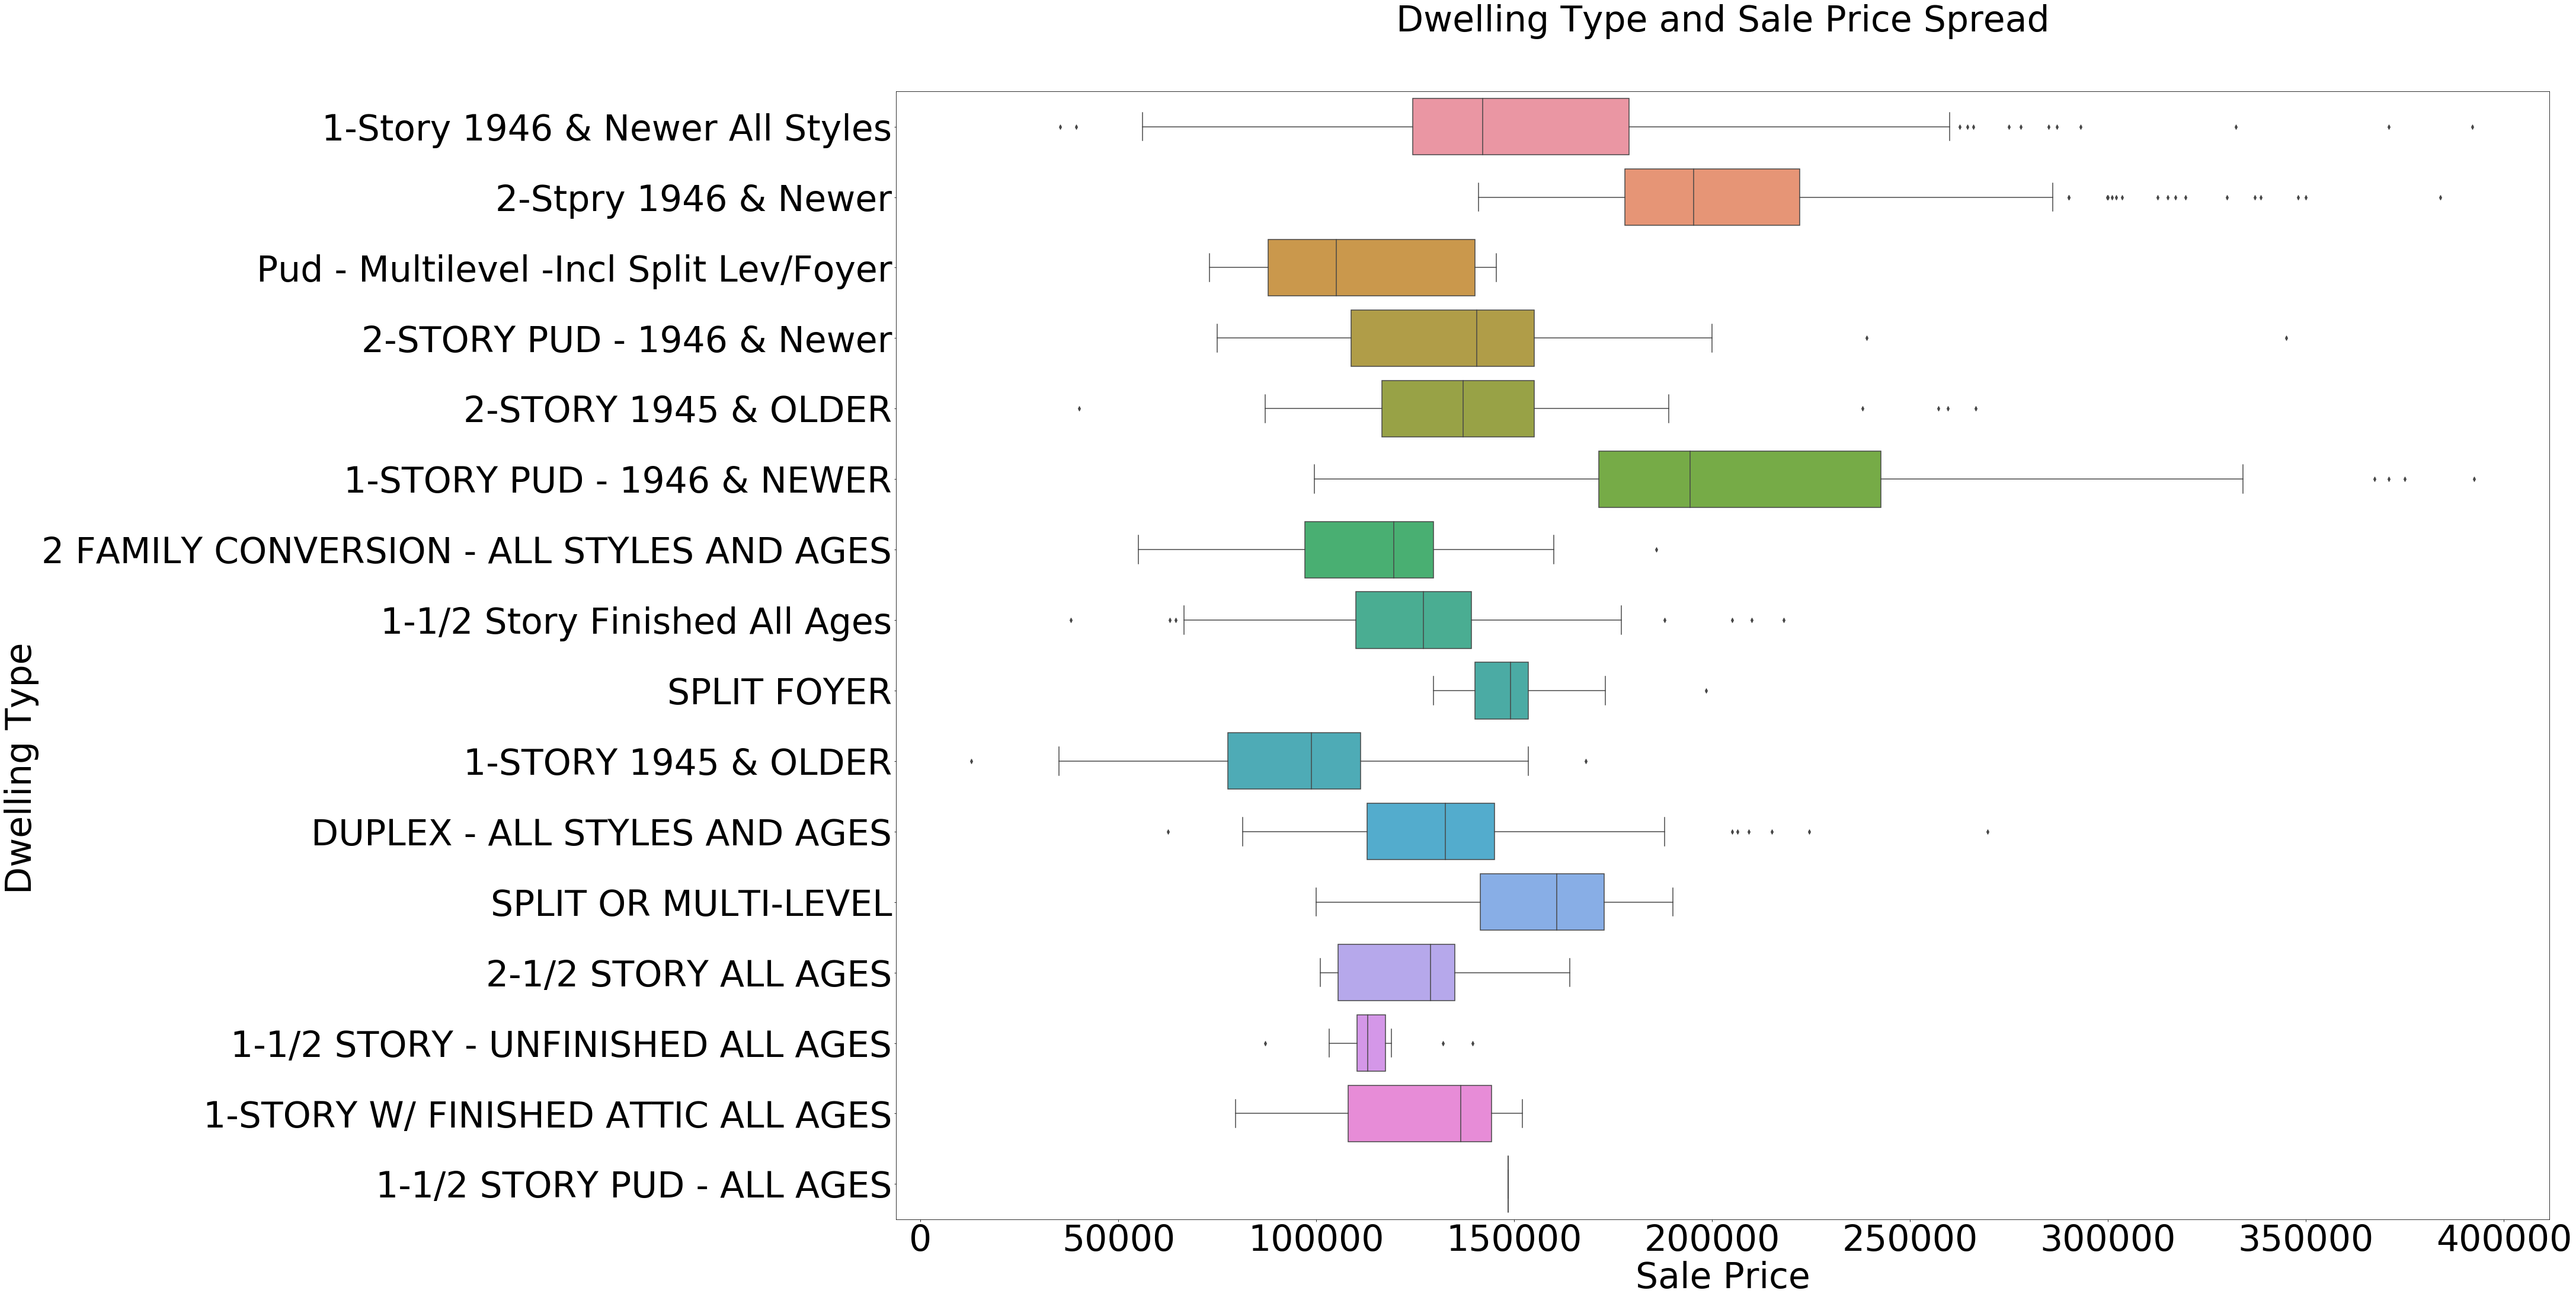

In [35]:
plt.figure(figsize=(50,35))
ax = sns.boxplot(y=df_train['MS SubClass'], x=df_train['SalePrice'], data=df_train)
ax.axes.set_title("Dwelling Type and Sale Price Spread", y = 1.05, fontsize=60)
ax.set_xlabel("Sale Price", y = 1.5, fontsize=60)  
ax.set_ylabel("Dwelling Type", y = .4, fontsize=60)
ax.tick_params(labelsize=60)

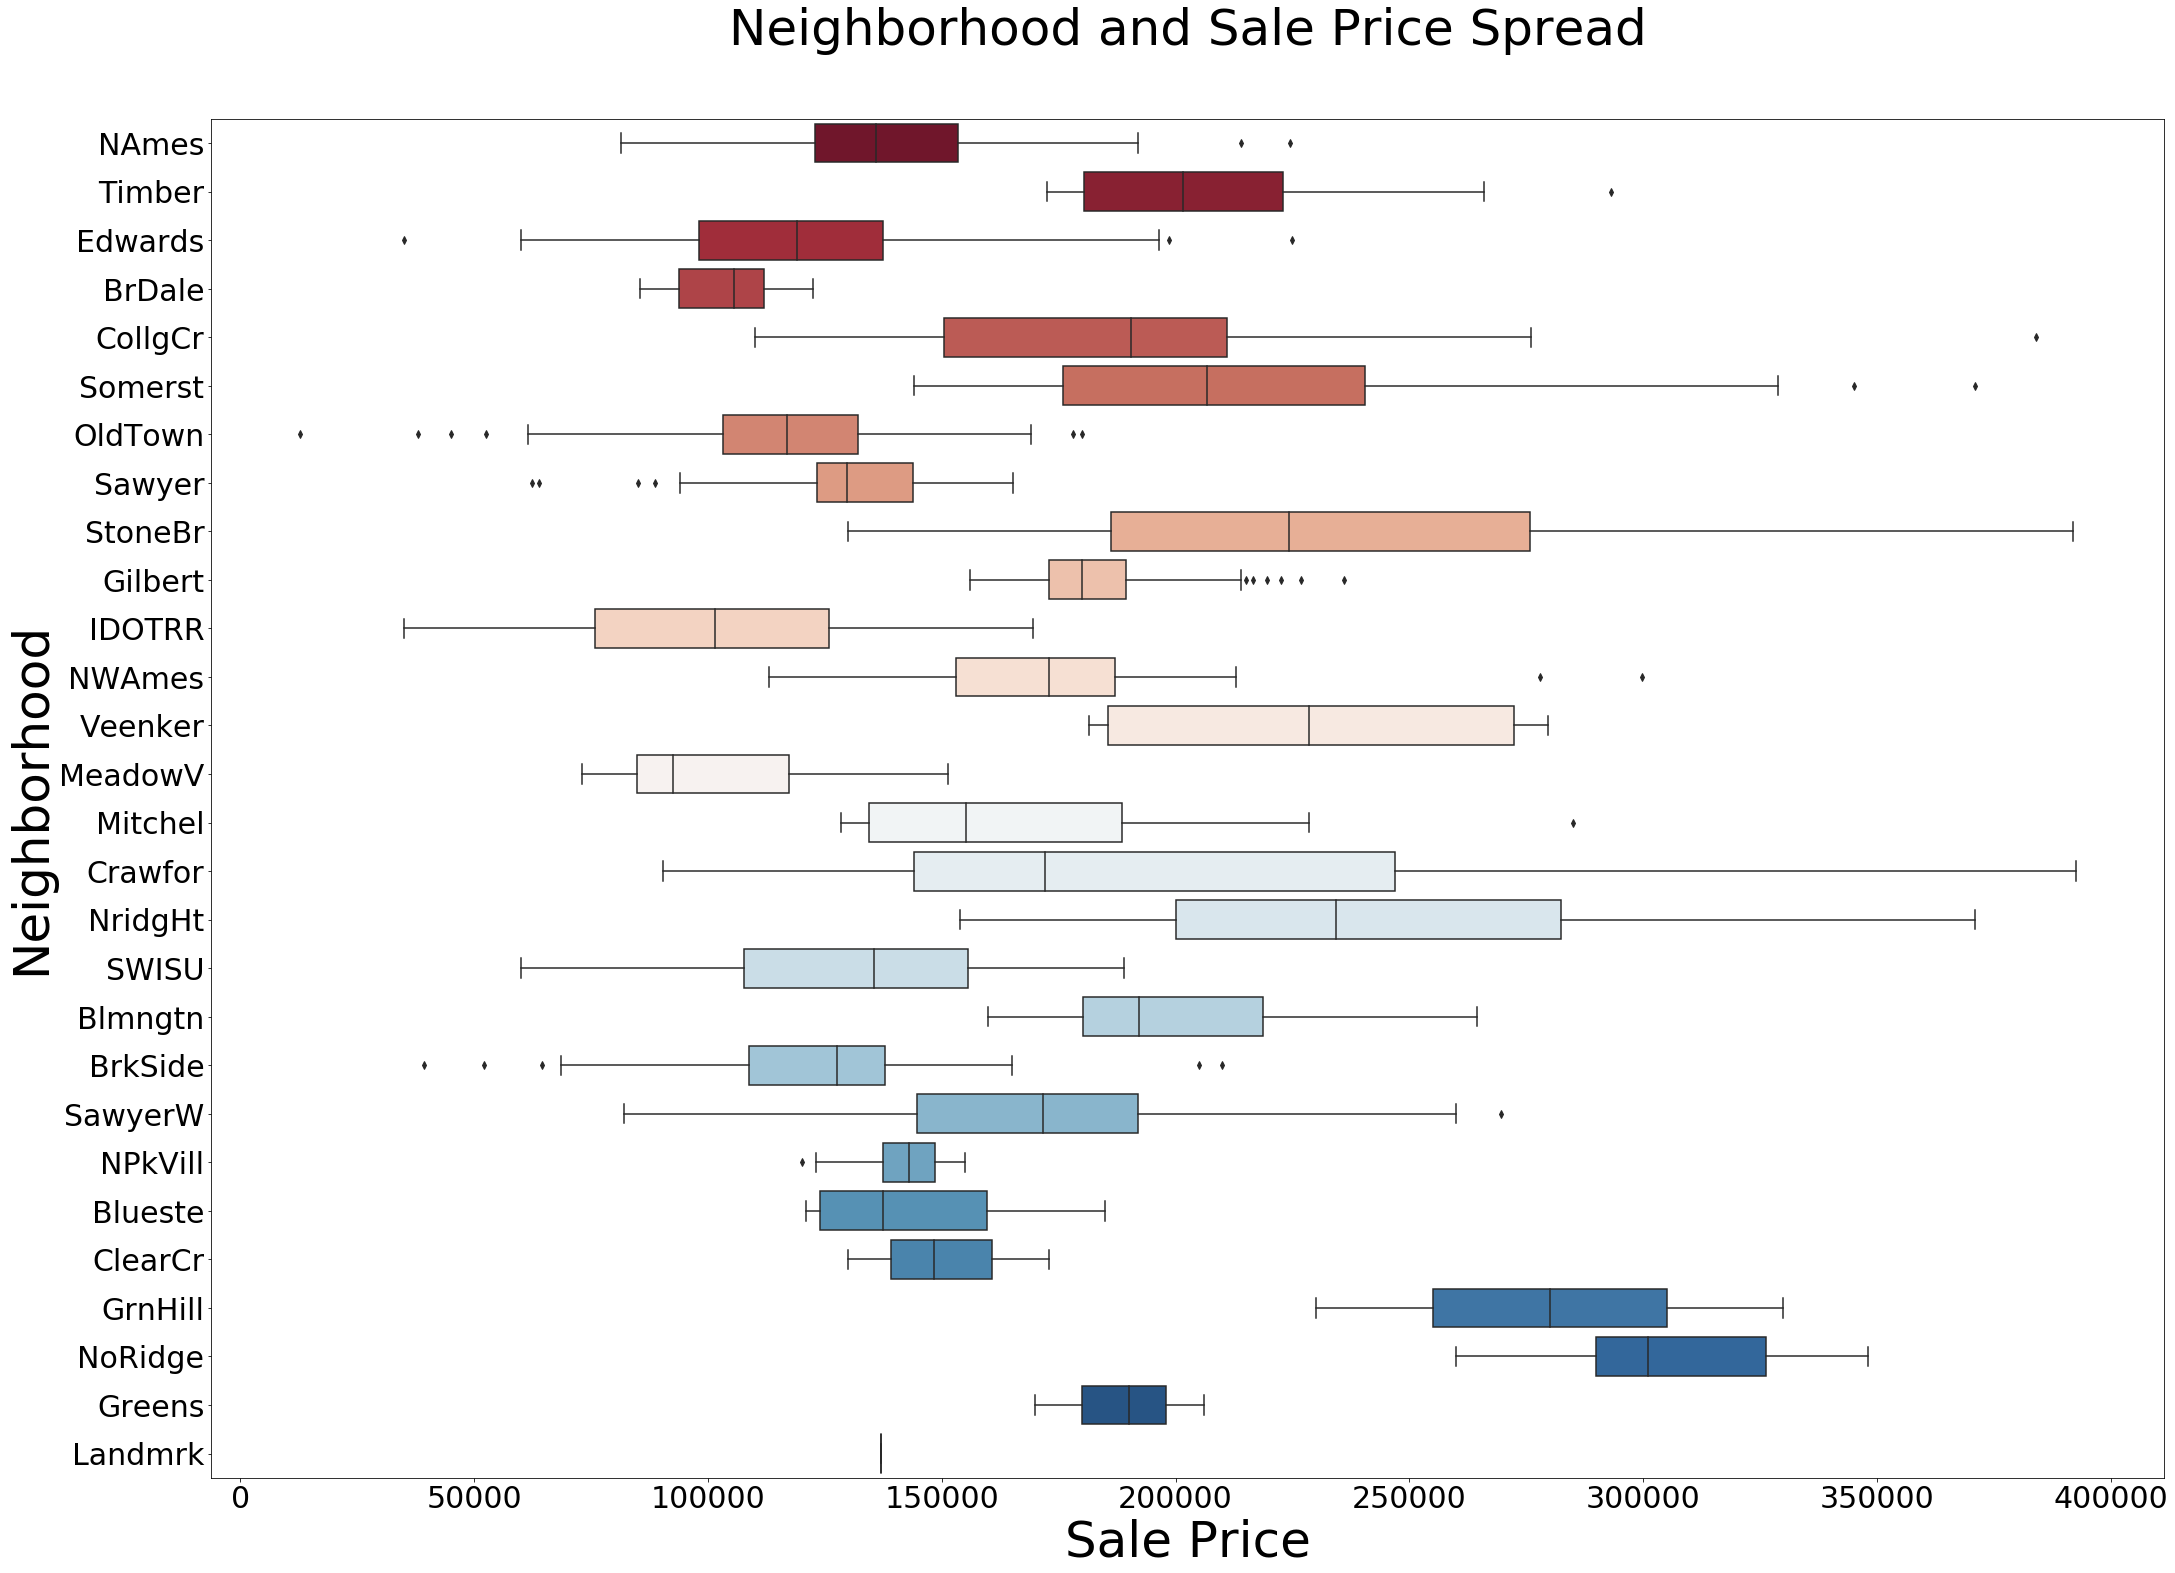

In [36]:
plt.figure(figsize=(35,25))
ax = sns.boxplot(y=df_train['Neighborhood'], x=df_train['SalePrice'], data=df_train,
                palette = 'RdBu')
ax.axes.set_title("Neighborhood and Sale Price Spread", y = 1.05, fontsize=50)
ax.set_xlabel("Sale Price", y = 1.5, fontsize=50)  
ax.set_ylabel("Neighborhood", y = .5, fontsize=50)
ax.tick_params(labelsize=30)

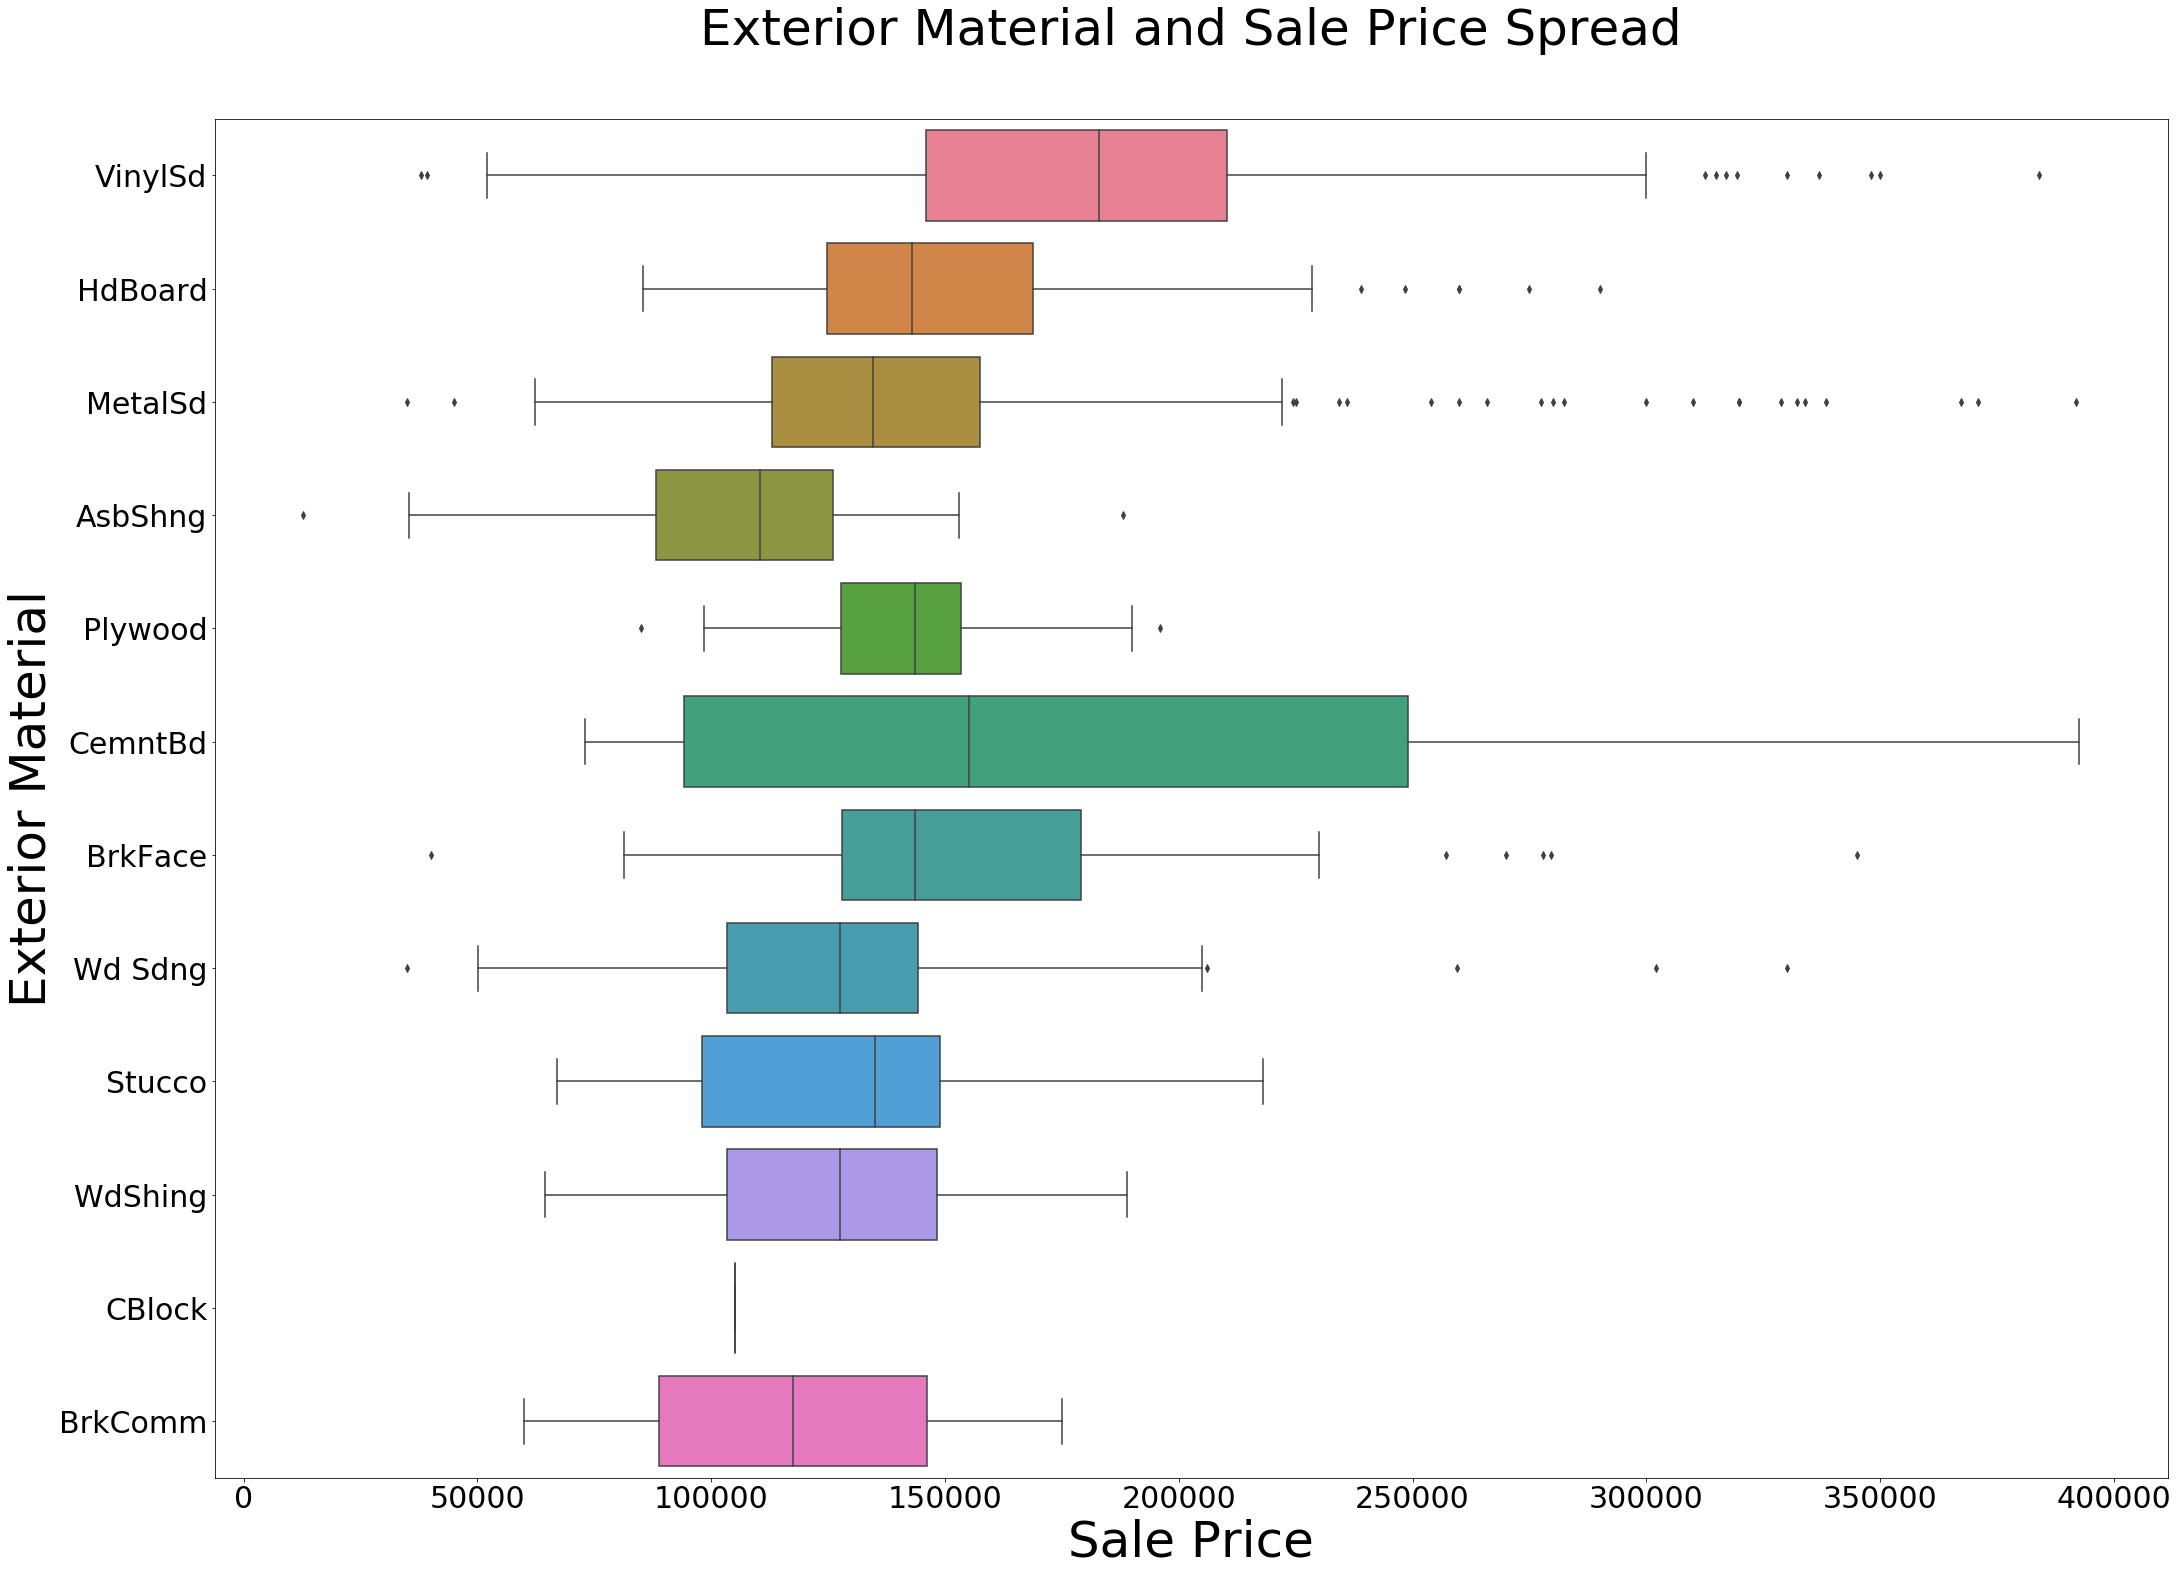

In [37]:
plt.figure(figsize=(35,25))
ax = sns.boxplot(y=df_train['Exterior 1st'], x=df_train['SalePrice'], data=df_train,
                palette = 'husl')
ax.axes.set_title("Exterior Material and Sale Price Spread", y = 1.05, fontsize=50)
ax.set_xlabel("Sale Price", y = 1.5, fontsize=50)  
ax.set_ylabel("Exterior Material", y = .5, fontsize=50)
ax.tick_params(labelsize=30)

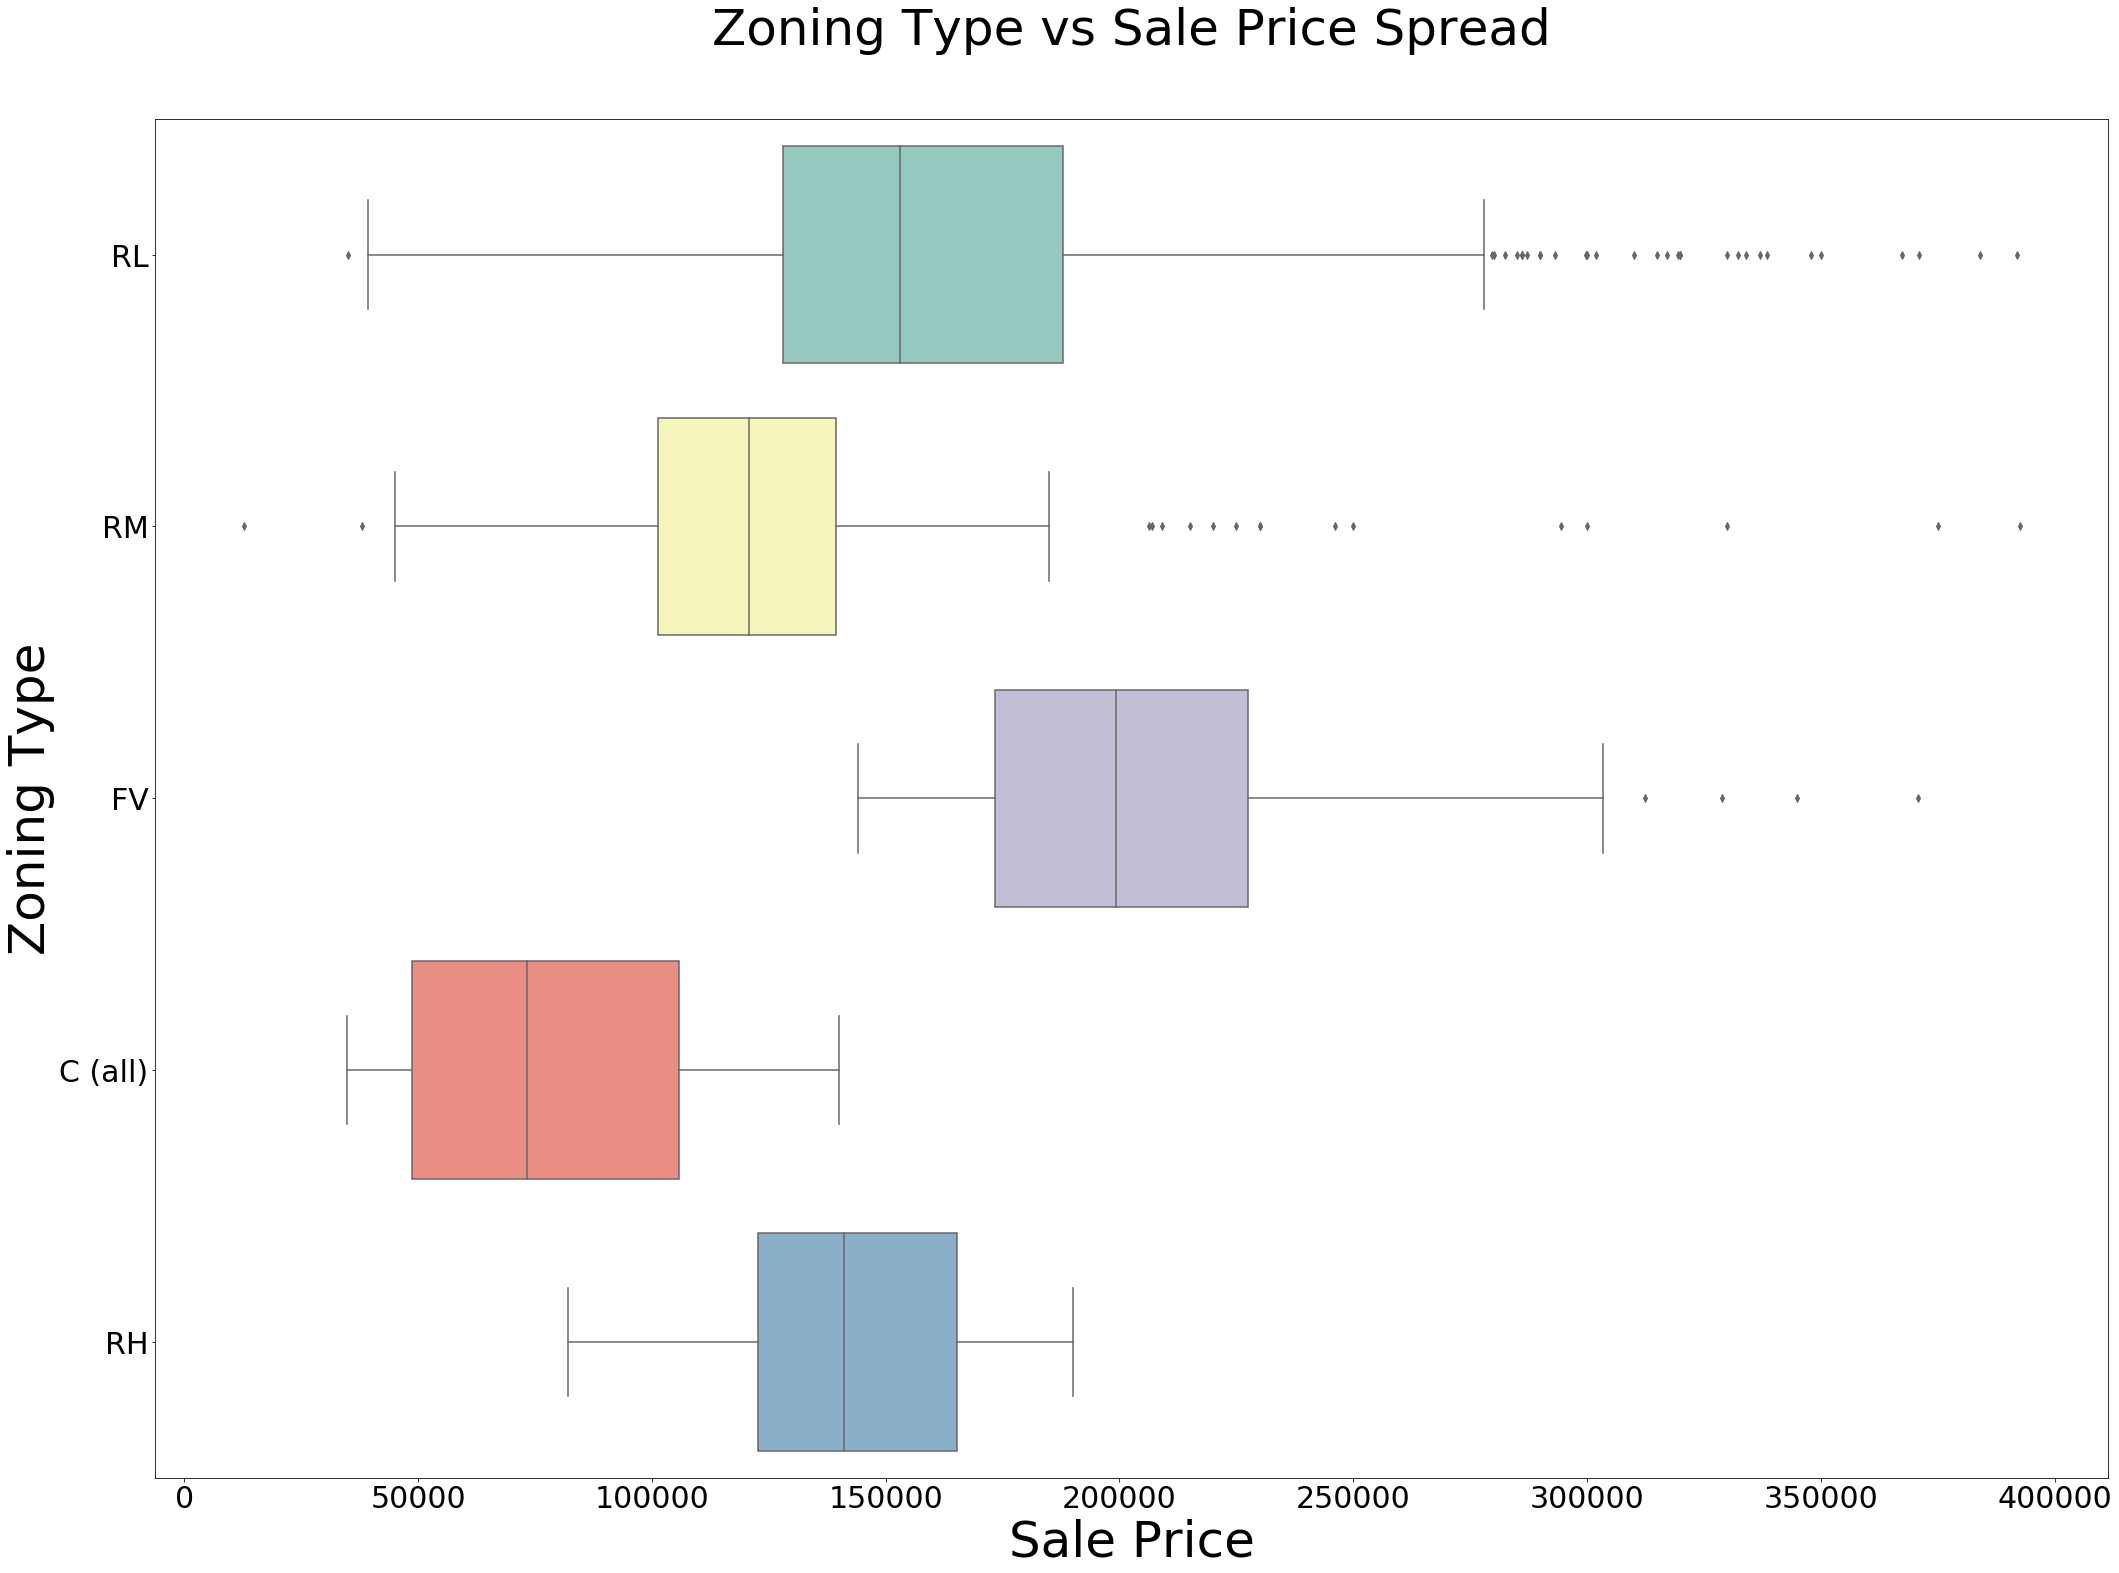

In [38]:
plt.figure(figsize=(35,25))
ax = sns.boxplot(y=df_train['MS Zoning'], x=df_train['SalePrice'], data=df_train,
                palette="Set3")
ax.axes.set_title("Zoning Type vs Sale Price Spread", y = 1.05, fontsize=50)
ax.set_xlabel("Sale Price", y = 1.5, fontsize=50)  
ax.set_ylabel("Zoning Type", y = .5, fontsize=50)
ax.tick_params(labelsize=30)

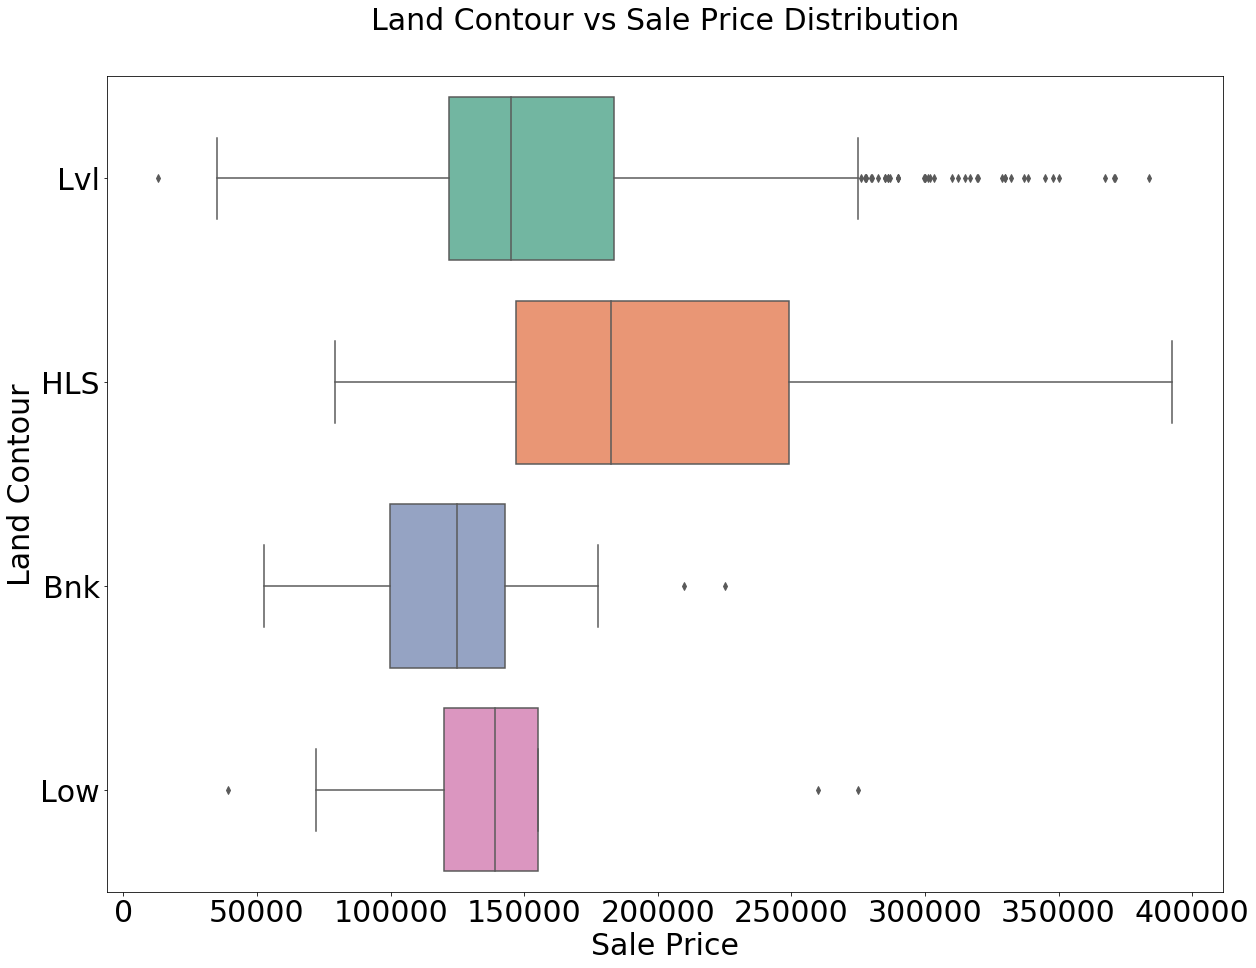

In [39]:
plt.figure(figsize=(20,15))
ax = sns.boxplot(y=df_train['Land Contour'], x=df_train['SalePrice'], data=df_train,
                palette='Set2')
ax.axes.set_title("Land Contour vs Sale Price Distribution", y = 1.05, fontsize=30)
ax.set_xlabel("Sale Price", y = 1.5, fontsize=30)  
ax.set_ylabel("Land Contour", y = .5, fontsize=30)
ax.tick_params(labelsize=30)

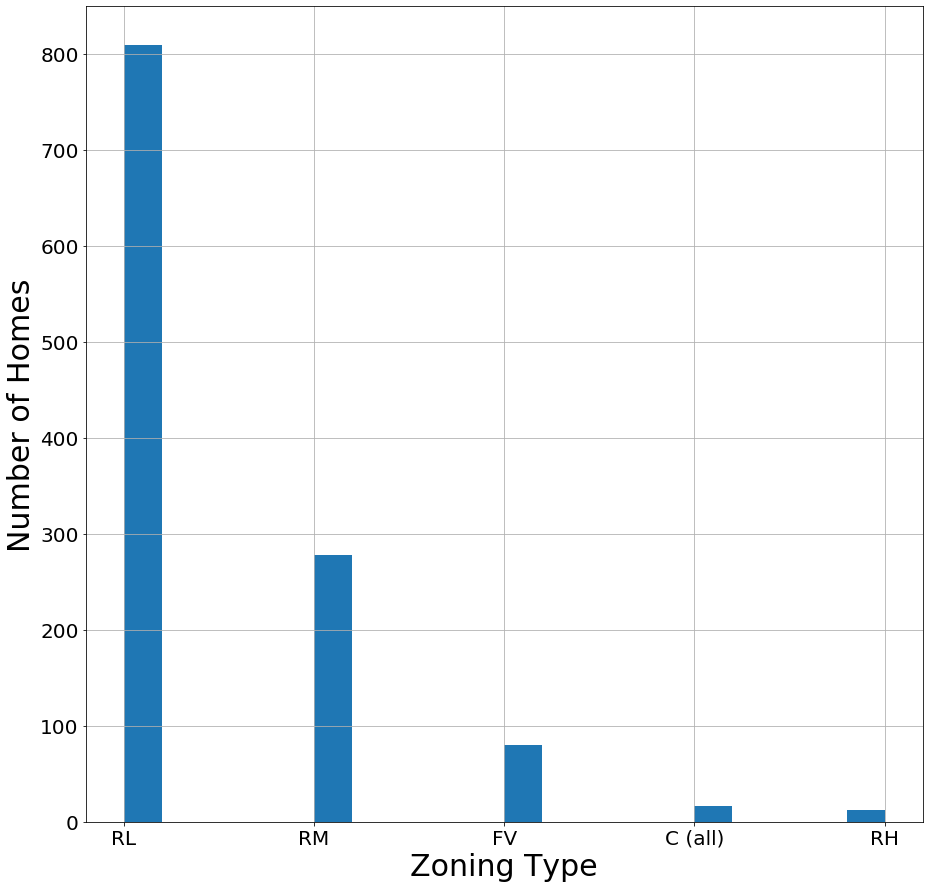

In [40]:
df_train['MS Zoning'].hist(figsize=(15,15), bins=20)
plt.xlabel("Zoning Type", fontsize = 30)
plt.ylabel("Number of Homes", fontsize = 30)
plt.tick_params(labelsize=20)

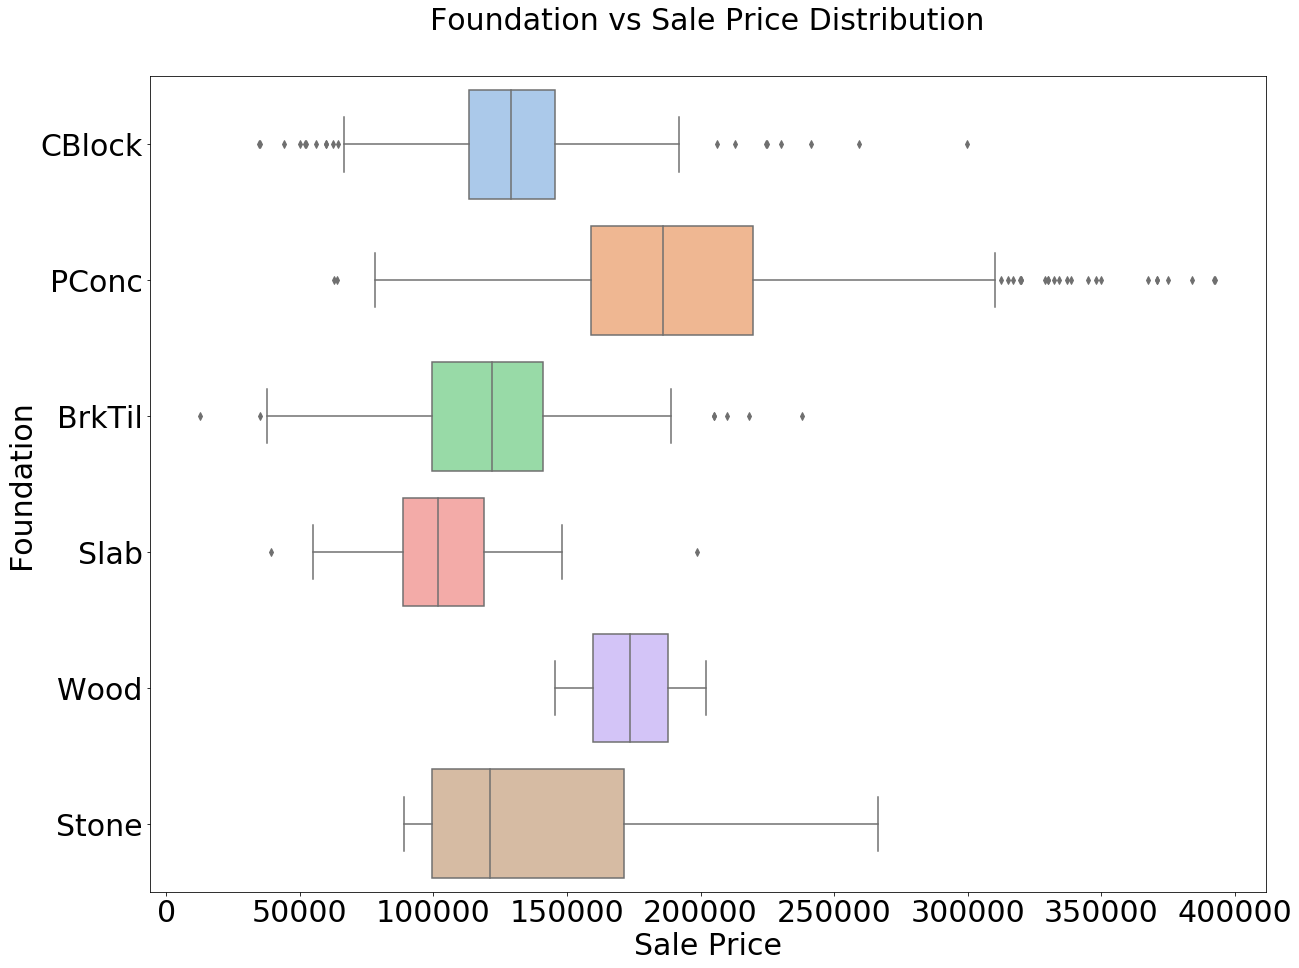

In [41]:
plt.figure(figsize=(20,15))
ax = sns.boxplot(y=df_train['Foundation'], x=df_train['SalePrice'], data=df_train,
                palette="pastel")
ax.axes.set_title("Foundation vs Sale Price Distribution", y = 1.05, fontsize=30)
ax.set_xlabel("Sale Price", y = 1.5, fontsize=30)  
ax.set_ylabel("Foundation", y = .5, fontsize=30)
ax.tick_params(labelsize=30)

The R-Squared value is 0.17973089550959598


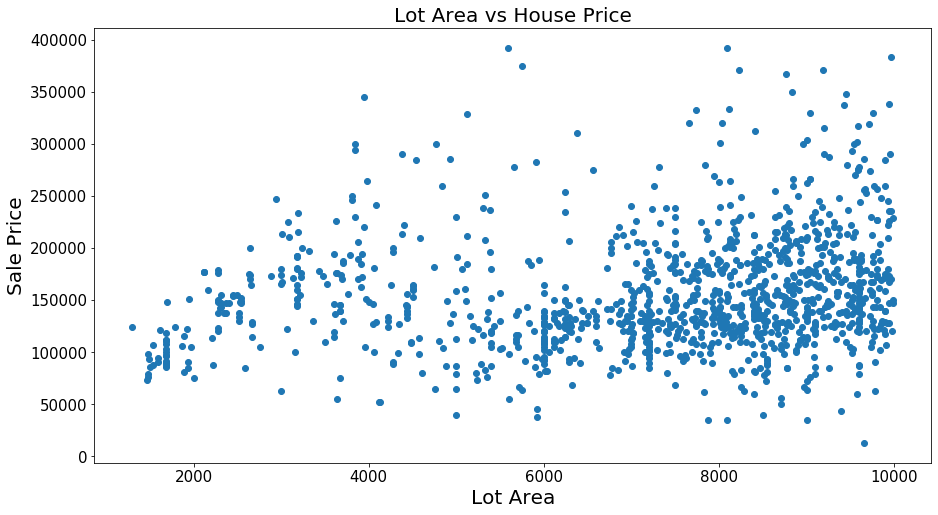

In [42]:
lotreg = sp.stats.linregress(df_train['Lot Area'], df_train['SalePrice'])


fig, ax = plt.subplots(figsize = (15,8))
ax.scatter(df_train['Lot Area'], df_train['SalePrice'])
ax.set_xlabel('Lot Area', fontsize = 20)
ax.set_ylabel('Sale Price', fontsize = 20)
plt.title("Lot Area vs House Price", fontsize = 20)
plt.text(5, 1, print('The R-Squared value is '+ str(lotreg.rvalue)))
plt.tick_params(labelsize=15)
plt.show()


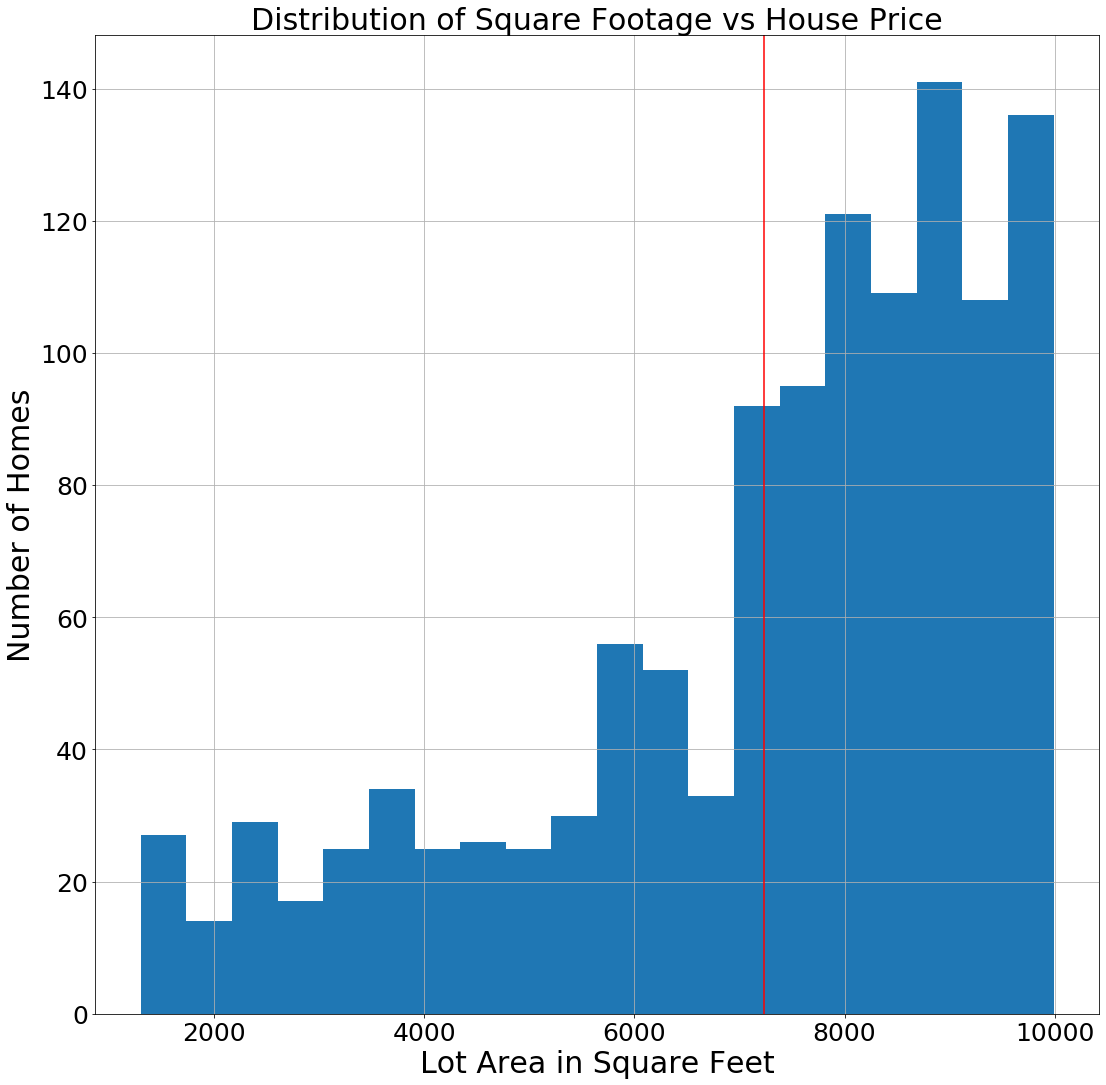

In [43]:
df_train['Lot Area'].hist(figsize=(18,18), bins=20)
plt.xlabel("Lot Area in Square Feet", fontsize = 30)
plt.ylabel("Number of Homes", fontsize = 30)
plt.title('Distribution of Square Footage vs House Price', fontsize = 30)
plt.tick_params(labelsize=25)
plt.axvline(np.mean(df_train['Lot Area']), c='r');

The R-Squared value is 0.6336741990597358


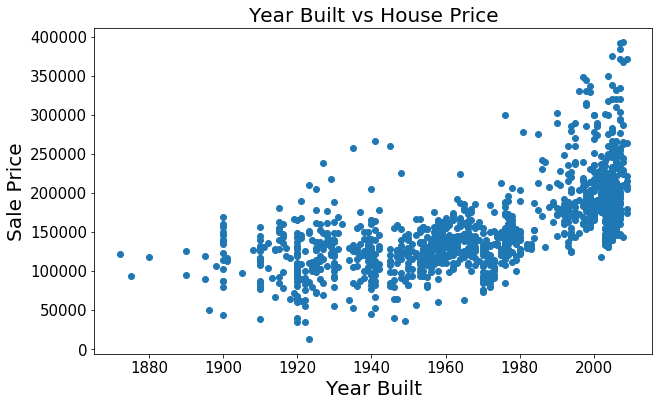

In [44]:
yearreg = sp.stats.linregress(df_train['Year Built'], df_train['SalePrice'])


fig, ax = plt.subplots(figsize = (10,6))
ax.scatter(df_train['Year Built'], df_train['SalePrice'])
ax.set_xlabel('Year Built', fontsize = 20)
ax.set_ylabel('Sale Price', fontsize = 20)
plt.title("Year Built vs House Price", fontsize = 20)
plt.text(5, 1, print('The R-Squared value is '+ str(yearreg.rvalue)))
plt.tick_params(labelsize=15)
plt.show()


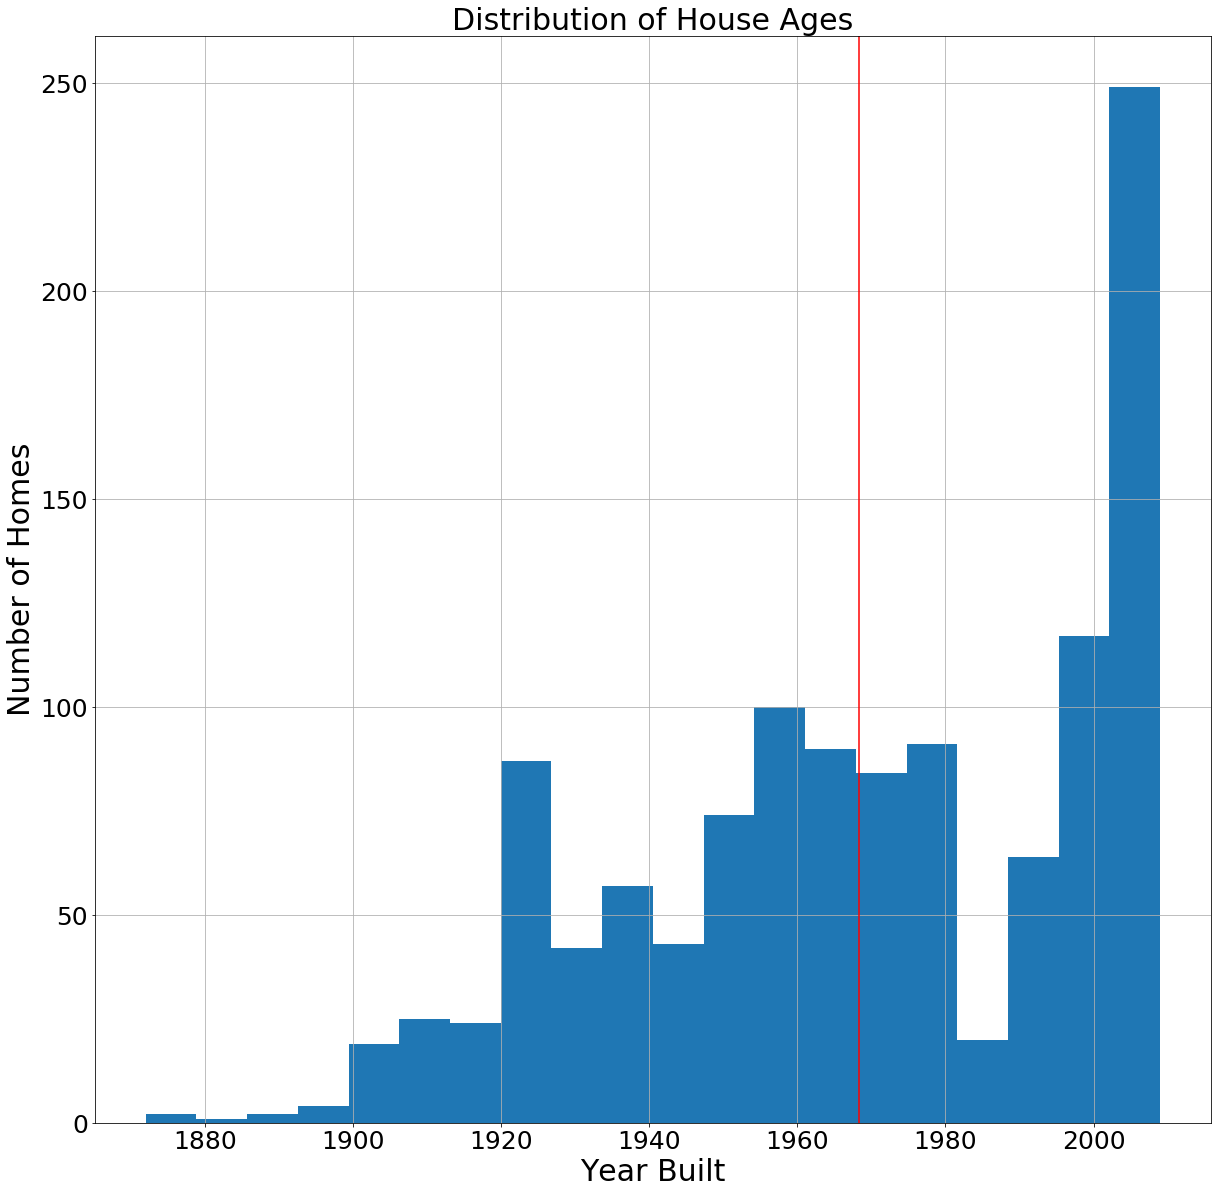

In [45]:
df_train['Year Built'].hist(figsize=(20,20), bins=20)
plt.xlabel('Year Built', fontsize = 30)
plt.ylabel("Number of Homes", fontsize = 30)
plt.title('Distribution of House Ages', fontsize = 30)
plt.tick_params(labelsize=25)
plt.axvline(np.mean(df_train['Year Built']), c='r');


# Model 2 Visuals <a id='model2visuals'></a>

Citation: https://stackoverflow.com/questions/51262395/plotting-the-r-square-error-for-regression-model-results/51263440

The R-Squared value is 0.3422743094293929


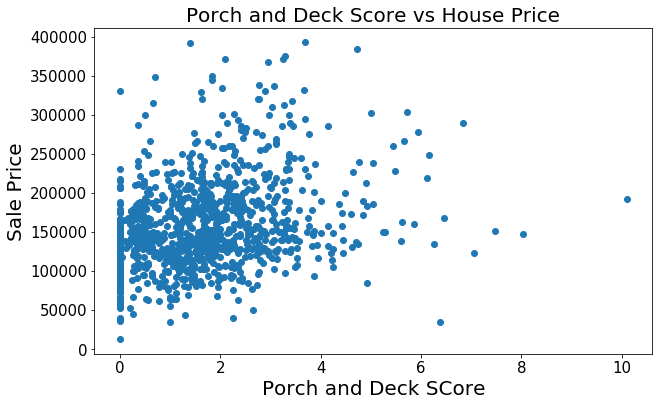

In [46]:
porchreg = sp.stats.linregress(df_train['porchdeck_score'], df_train['SalePrice'])


fig, ax = plt.subplots(figsize = (10,6))
ax.scatter(df_train['porchdeck_score'], df_train['SalePrice'])
ax.set_xlabel('Porch and Deck SCore', fontsize = 20)
ax.set_ylabel('Sale Price', fontsize = 20)
plt.title("Porch and Deck Score vs House Price", fontsize = 20)
plt.text(5, 1, print('The R-Squared value is '+ str(porchreg.rvalue)))
plt.tick_params(labelsize=15)
plt.show()


The R-Squared value is 0.44318826674397316


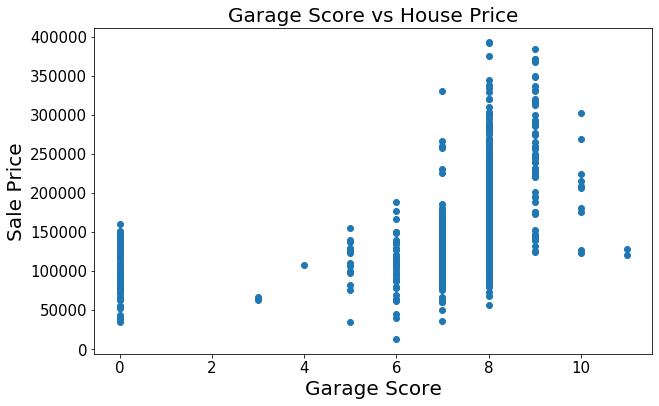

In [47]:
garagereg = sp.stats.linregress(df_train['garage_score'], df_train['SalePrice'])


fig, ax = plt.subplots(figsize = (10,6))
ax.scatter(df_train['garage_score'], df_train['SalePrice'])
ax.set_xlabel('Garage Score', fontsize = 20)
ax.set_ylabel('Sale Price', fontsize = 20)
plt.title("Garage Score vs House Price", fontsize = 20)
plt.text(5, 2, print('The R-Squared value is '+ str(garagereg.rvalue)))
plt.tick_params(labelsize=15)
plt.show()


The R-Squared value is 0.49453690100405817


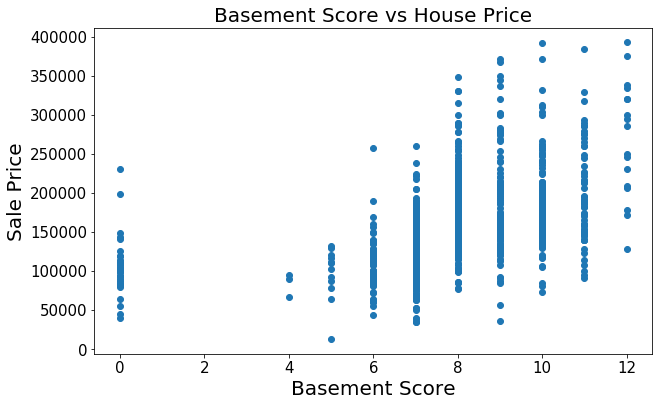

In [48]:
bsmtreg = sp.stats.linregress(df_train['bsmt_score'], df_train['SalePrice'])


fig, ax = plt.subplots(figsize = (10,6))
ax.scatter(df_train['bsmt_score'], df_train['SalePrice'])
ax.set_xlabel('Basement Score', fontsize = 20)
ax.set_ylabel('Sale Price', fontsize = 20)
plt.title("Basement Score vs House Price", fontsize = 20)
plt.text(5, 1, print('The R-Squared value is '+ str(bsmtreg.rvalue)))
plt.tick_params(labelsize=15)
plt.show()


The R-Squared value is 0.6418186234374006


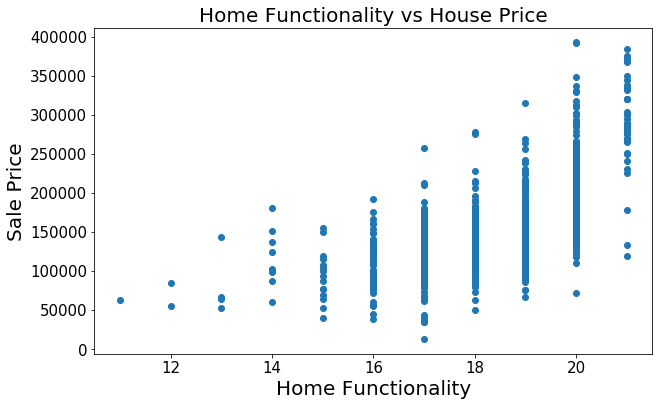

In [49]:
funcreg = sp.stats.linregress(df_train['func_score'], df_train['SalePrice'])


fig, ax = plt.subplots(figsize = (10,6))
ax.scatter(df_train['func_score'], df_train['SalePrice'])
ax.set_xlabel('Home Functionality', fontsize = 20)
ax.set_ylabel('Sale Price', fontsize = 20)
plt.title("Home Functionality vs House Price", fontsize = 20)
plt.text(5, 1, print('The R-Squared value is '+ str(funcreg.rvalue)))
plt.tick_params(labelsize=15)
plt.show()

The R-Squared value is 0.6126831484189313


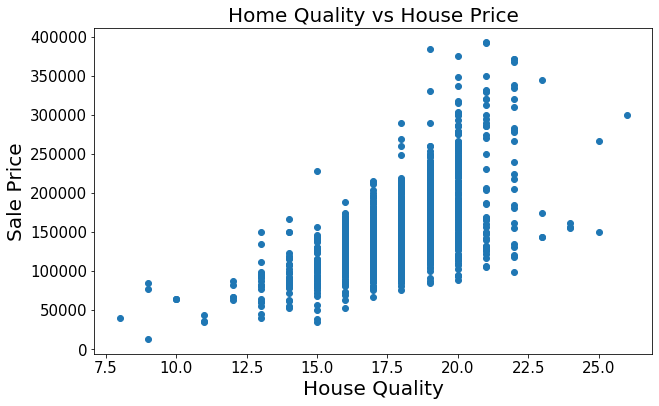

In [50]:
qualreg = sp.stats.linregress(df_train['qual_score'], df_train['SalePrice'])


fig, ax = plt.subplots(figsize = (10,6))
ax.scatter(df_train['qual_score'], df_train['SalePrice'])
ax.set_xlabel('House Quality', fontsize = 20)
ax.set_ylabel('Sale Price', fontsize = 20)
plt.title("Home Quality vs House Price", fontsize = 20)
plt.text(5, 1, print('The R-Squared value is '+ str(qualreg.rvalue)))
plt.tick_params(labelsize=15)
plt.show()

The R-Squared value is 0.2398552477631885


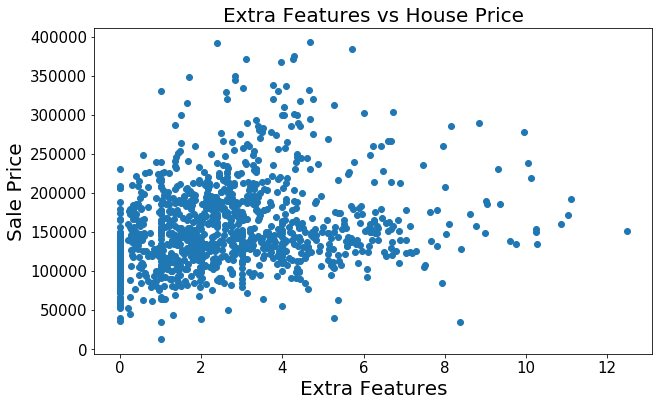

In [51]:
extrareg = sp.stats.linregress(df_train['extras'], df_train['SalePrice'])


fig, ax = plt.subplots(figsize = (10,6))
ax.scatter(df_train['extras'], df_train['SalePrice'])
ax.set_xlabel('Extra Features', fontsize = 20)
ax.set_ylabel('Sale Price', fontsize = 20)
plt.title("Extra Features vs House Price", fontsize = 20)
plt.text(5, 1, print('The R-Squared value is '+ str(extrareg.rvalue)))
plt.tick_params(labelsize=15)
plt.show()

# 5) Pre-Processing <a id='preprocess'></a>

## Feature Selection Model 1 <a id='featureselection1'></a>

**Methodology**: Model 1 contains mostly categorical data therefore we need to get dummies for these categories. From there I will check the correlations of each dummy with sale price to select which ones I will use in Model 1.

In [52]:
#checking shape before writing function below
df_train.shape

(1195, 83)

In [53]:
#Creating a list of the features we want to dummy
dummylist = ['MS SubClass', 'MS Zoning', 'Land Contour', 'Land Slope', 
    'Neighborhood', 'Bldg Type', 'House Style', 'Exterior 1st','Foundation', 'Street']
dataframe = pd.get_dummies(df_train, columns = dummylist, drop_first = False)

In [54]:
#Citation: Noah assisted me here.
#Iterating through our dummy list and producing a list of columns that contain 
#those strings in their name.
dummy_cols = [col for dummy in dummylist for col in dataframe.columns if dummy in col]

In [55]:
dummy_cols.append('SalePrice')

In [56]:
#Getting correlations between our dummy columns and sale price
dataframe[dummy_cols].corr()[['SalePrice']].sort_values(by = 'SalePrice', ascending = False)  

SalePrice
SalePrice                                            1.000000
Foundation_PConc                                     0.600782
MS SubClass_2-Stpry 1946 & Newer                     0.390139
Exterior 1st_VinylSd                                 0.340377
MS SubClass_1-STORY PUD - 1946 & NEWER               0.332624
Neighborhood_NridgHt                                 0.296853
Neighborhood_Somerst                                 0.296840
Bldg Type_TwnhsE                                     0.281106
Neighborhood_NoRidge                                 0.250519
MS Zoning_FV                                         0.249979
House Style_2Story                                   0.194038
MS Zoning_RL                                         0.190979
Neighborhood_StoneBr                                 0.186100
Neighborhood_CollgCr                                 0.158427
Land Contour_HLS                                     0.156858
Neighborhood_Crawfor                                 0.128207
Neighborhood_Gilbert                                 0.126822
Neighborhood_Timber                                  0.111260
Neighborhood_Blmngtn                                 0.111233
Exterior 1st_CemntBd                                 0.101743
Neighborhood_GrnHill                                 0.092464
Street_Pave                                          0.090797
Neighborhood_Veenker                                 0.077748
Neighborhood_SawyerW                                 0.058140
Land Slope_Mod                                       0.058071
Neighborhood_NWAmes                                  0.052675
Neighborhood_Mitchel                                 0.032582
Neighborhood_Greens                                  0.030035
Exterior 1st_BrkFace                                 0.015869
Foundation_Wood                                      0.013415
MS SubClass_SPLIT OR MULTI-LEVEL                     0.002960
House Style_2.5Unf                                  -0.003336
MS SubClass_1-1/2 STORY PUD - ALL AGES              -0.003848
Neighborhood_ClearCr                                -0.004787
Foundation_Stone                                    -0.006502
House Style_1Story                                  -0.007212
Land Contour_Lvl                                    -0.009302
Neighborhood_Landmrk                                -0.009843
MS SubClass_SPLIT FOYER                             -0.010069
Land Contour_Low                                    -0.011831
House Style_SLvl                                    -0.013873
Neighborhood_Blueste                                -0.014395
MS SubClass_1-Story 1946 & Newer All Styles         -0.023305
MS Zoning_RH                                        -0.024643
Land Slope_Sev                                      -0.024841
House Style_SFoyer                                  -0.025229
Exterior 1st_CBlock                                 -0.026671
House Style_2.5Fin                                  -0.027197
Exterior 1st_BrkComm                                -0.028434
MS SubClass_1-STORY W/ FINISHED ATTIC ALL AGES      -0.030129
Neighborhood_NPkVill                                -0.033271
MS SubClass_2-1/2 STORY ALL AGES                    -0.044239
Exterior 1st_HdBoard                                -0.047981
Land Slope_Gtl                                      -0.053673
Exterior 1st_Plywood                                -0.056826
Exterior 1st_Stucco                                 -0.064984
MS SubClass_2-STORY 1945 & OLDER                    -0.068343
MS SubClass_1-1/2 STORY - UNFINISHED ALL AGES       -0.069370
Neighborhood_SWISU                                  -0.070046
House Style_1.5Unf                                  -0.079898
MS SubClass_Pud - Multilevel -Incl Split Lev/Foyer  -0.080646
Bldg Type_Duplex                                    -0.080725
MS SubClass_DUPLEX - ALL STYLES AND AGES            -0.080725
Exterior 1st_WdShing                                -0.082682
Exterior 1st_MetalSd  

## Feature Selection Model 2 <a id='featureselection2'></a>

**Citation**: Corrwith documentation https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corrwith.html

In [57]:
columns = ['bsmt_score', 'garage_score','func_score','porchdeck_score','qual_score']

In [58]:
print (df_train[['bsmt_score', 'garage_score', 
                 'func_score', 'porchdeck_score',
                'qual_score', 'extras']].corrwith(df_train['SalePrice'])) 

bsmt_score         0.494537
garage_score       0.443188
func_score         0.641819
porchdeck_score    0.342274
qual_score         0.612683
extras             0.239855
dtype: float64


### Summation of Feature Selection <a id='featuresummary'></a>

We selected categories for each model which we deemed relevant for each model type. Model 1's feature selection was based on categories of a home which are static such as building type,  zoning type, land slope, neighborhood, lot area etc. Model 2 has dynamic features of a home such as functionality, overall quality, porch quality, garage quality, and extras such as pools, fireplaces, fences etc. I decided to choose the two highest dummy variable correlations with sale price for each categorical feature for Model 1. Model 2 did not require dummy variables, those features were scores created from many original features. We did not simply select the features with the highest correlations to sale price because my models represent two different investment and research styles; do we care more about static features of a property or do we invest in the dynamic features of a property? How the models eventually do determines the best decision. It was critical that I include features even if they had low correlation scores so that the best decision could be made.

**Feature Selection for Model 1**: 

- **'MS SubClass'**: MS SubClass_2-Stpry 1946 & Newer, MS SubClass_1-STORY PUD - 1946 & NEWER 
- **'MS Zoning'** : MS Zoning_FV, MS Zoning_RM
- **'Land Contour'**:  Land Contour_HLS
- **'Land Slope'**:  Land Slope_Mod
- **'Neighborhood'**: - Neighborhood_NridgHt, Neighborhood_Somerst, Neighborhood_OldTown
- **'Bldg Type'**: Bldg Type_TwnhsE
- **'House Style'**: House Style_2Story, House Style_1.5Fin
- **'Exterior 1st'**: Exterior 1st_VinylSd, Exterior 1st_Wd Sdng
- **'Foundation'** - Foundation_PConc, Foundation_BrkTil
- **'Street'** - Street_Pave
- **Lot Area**
- **Year Built**

**Feature Selection for Model 2**:
- **bsmt_score**
- **garage_score**
- **func_score**
- **porchdeck_score**
- **qual_score**


## Cleaning Test Dataframe and Reconciling Differences in Dummy Columns <a id='testclean'></a>

Applying the functions created above to our test dataframe which involves converting nominal and ordinal columns, then removing outliers, filling nans, dropping collinear columns, and adding on extra terms.

We must then create dummy columns for our train and test dataframe then add on the differences between each of them since each dataframe has values that the other may not.

In [59]:
conversions(df_test)
fillna(df_test)
droppedcol(df_test)
extra_terms(df_test)

In [60]:
#Just checking to see the size of our dataframes
print(df_train.shape)
print(df_test.shape)

(1195, 83)
(878, 82)


In [61]:
#Creating a list of the features we need dummy variables for.
dummylist = ['MS SubClass', 'MS Zoning', 'Land Contour', 'Land Slope', 
    'Neighborhood', 'Bldg Type', 'House Style', 'Exterior 1st','Foundation', 'Street']

In [62]:
df_train = pd.get_dummies(df_train, columns = dummylist, drop_first = False)

In [63]:
df_train

PID Lot Frontage  Lot Area     Alley Lot Shape  Utilities  \
Id                                                                      
153   535304180           68      7922  No Alley       Reg          4   
318   916386060           73      9802  No Alley       Reg          4   
2827  908186070           35      3675  No Alley       Reg          4   
1044  527451290           21      1680  No Alley       Reg          4   
2752  906380150           64      7488  No Alley       IR1          4   
1177  533236070           24      2645      Pave       Reg          4   
1480  907418040           74      9627  No Alley       Reg          4   
1311  902301140           34      4571      Grvl       Reg          4   
770   905101490           80      8816  No Alley       Reg          4   
2063  905107140           71      8197  No Alley       Reg          4   
69    528458070           72      8640  No Alley       Reg          4   
2062  905106150          109      8724  No Alley       Reg          4   
351   527131030           40      5664  No Alley       IR1          4   
12    527165230            1      7980  No Alley       IR1          4   
86    532376160           65      8450  No Alley       Reg          4   
2243  911103060           75      8250  No Alley       Reg          4   
1957  535450190           60      8064  No Alley       Reg          4   
380   527355150           80      9600  No Alley       Reg          4   
2517  533250130           30      9549  No Alley       IR1          4   
675   535426150           80      9000  No Alley       IR1          4   
2910  923225240           41      2665  No Alley       Reg          4   
1873  534177210           80      9600  No Alley       Reg          4   
2125  907135050           60      8428  No Alley       IR2          4   
1489  908102260           75      9937  No Alley       Reg          4   
983   923275040            1      9101  No Alley       IR1          4   
1537  909281110          100      9670  No Alley       IR1          4   
1532  909275050           60      7200  No Alley       Reg          4   
132   534475100           80      9920  No Alley       Reg          4   
1078  528188090           36      2448  No Alley       Reg          4   
2511  533221080            1      2998  No Alley       Reg          4   
912   909250220           65      7804  No Alley       Reg          4   
330   923226250           21      1476  No Alley       Reg          4   
224   905106140           80      9364  No Alley       Reg          4   
98    533212020           24      2544      Pave       Reg          4   
2565  534479300           82      9888  No Alley       Reg          4   
1934  535304170           68      7942  No Alley       Reg          4   
1799  528458130           75      9000  No Alley       Reg          4   
1295  902109160           81      7308  No Alley       Reg          4   
638   535178120           70      8750  No Alley       Reg          4   
2278  923202134           70      8402  No Alley       Reg          4   
2202  909252150           63      4000  No Alley       Reg          4   
2833  908188150           32      3363  No Alley       Reg          4   
2428  528228565           43      3013  No Alley       Reg          4   
2613  535403150           79      8910  No Alley       Reg          4   
2832  908188140           24      2522  No Alley       Reg          4   
2459  528439030           73      8688  No Alley       Reg          4   
1360  903452025            1      6291  No Alley       IR1          4   
1350  903235100           60      6324  No Alley       IR1          4   
2235  910201050           50      7288  No Alley       Reg          4   
1993  902301130           35      4571      Grvl       Reg          4   
402   527425110           60      9000  No Alley       Reg          4   
1592  923203140           32      4500  No Alley       Reg          4   
2409  528186110           48      6373  No Alley       Reg          4 

In [64]:
df_test = pd.get_dummies(df_test, columns = dummylist, drop_first = False)

In [65]:
df_test

PID Lot Frontage  Lot Area     Alley Lot Shape  Utilities  \
Id                                                                       
2658   902301120           69      9142      Grvl       Reg          4   
2718   905108090            1      9662  No Alley       IR1          4   
2414   528218130           58     17104  No Alley       IR1          4   
1989   902207150           60      8520  No Alley       Reg          4   
625    535105100            1      9500  No Alley       IR1          4   
333    923228370           21      1890  No Alley       Reg          4   
1327   902427150           52      8516  No Alley       Reg          4   
858    907202130            1      9286  No Alley       IR1          4   
95     533208090           39      3515      Pave       Reg          4   
1568   914476010           75     10125  No Alley       Reg          4   
2482   531452100           50      7175  No Alley       Reg          4   
1364   903455140           60      7200  No Alley       Reg          4   
2584   535303050           75     11310  No Alley       Reg          4   
818    906230030            1      7976  No Alley       Reg          4   
2673   903206160           69     11737  No Alley       IR1          4   
2089   905480180           60      9060  No Alley       Reg          4   
1297   902128150           60     10800      Grvl       Reg          4   
790    905451300           68      9571  No Alley       Reg          4   
2616   535425040           80     10800  No Alley       Reg          4   
720    902330040          121     17671      Grvl       Reg          4   
222    905105070            1      8246  No Alley       IR1          4   
557    532354160            1      8499  No Alley       IR1          4   
1148   531451020           50      8012  No Alley       Reg          4   
2766   906475050            1     21453  No Alley       IR1          4   
534    531363010           80      9605  No Alley       Reg          4   
1452   907227050           60      7180  No Alley       IR1          4   
630    535150070            1     12513  No Alley       IR1          4   
2648   902125020           50      9000      Grvl       Reg          4   
125    534425310           80      8800  No Alley       Reg          4   
1904   534451020           51      3500  No Alley       Reg          4   
1670   527404150            1      7340  No Alley       IR1          4   
756    903458170           52      6240      Grvl       Reg          4   
717    902326030           65     11700      Pave       IR1          4   
1032   527378020           80     10000  No Alley       Reg          4   
852    907196060           75     11166  No Alley       Reg          4   
1731   528218100           58     13204  No Alley       IR1          4   
2639   902103090           60      5520  No Alley       Reg          4   
2071   905228020            1      9000  No Alley       Reg          4   
1267   535451010           74      8892  No Alley       Reg          4   
1851   533242080           73      7321      Pave       IR1          4   
567    533210010           40      3951      Pave       Reg          4   
2439   528280100            1     11214  No Alley       IR1          4   
1898   534427140           75      7388  No Alley       Reg          4   
647    535351050           75     14559  No Alley       Reg          4   
2256   916226090           46      4054  No Alley       IR1          4   
979    923228150           21      1533  No Alley       Reg          4   
1444   907196050           68     11250  No Alley       IR1          4   
2485   531479030           60      7800  No Alley       Reg          4   
157    535350040           74      5868  No Alley       Reg          4   
88     532377100           75      7500  No Alley       Reg          4   
2003   902427040           52      9439  No Alley       Reg          4   
186    902329030           50      9000      Grvl       Reg          4   
1425   906380030 

In [66]:
#Making a variable to show the columns that test is missing

cols_in_train_not_test = set(df_train) - set (df_test)
print(cols_in_train_not_test)

{'MS SubClass_1-1/2 STORY PUD - ALL AGES', 'Neighborhood_Landmrk', 'Neighborhood_GrnHill', 'Exterior 1st_CBlock', 'SalePrice'}


In [67]:
#Making a variable to show which columns train is missing
cols_in_test_not_train = set(df_test) - set(df_train)
print(cols_in_test_not_train)

{'MS Zoning_I (all)', 'Exterior 1st_AsphShn', 'Exterior 1st_PreCast'}


In [68]:
#For each column that is missing in each dataframre we add it and fill with 0s

for col in cols_in_train_not_test:
    df_test[col] = 0
    
for col in cols_in_test_not_train:
    df_train[col] = 0

In [69]:
#Checking to make sure there are no differences
print(set(df_train)-set(df_test))
print(set(df_test)-set(df_train))

set()
set()


In [70]:
#Because both dataframes now have the same dummy columns we can just drop first from each. 
dummy_col_list = [col for dummy in dummylist for col in df_train.columns if dummy in col]

In [71]:
dummy_col_list

['MS SubClass_1-1/2 STORY - UNFINISHED ALL AGES',
 'MS SubClass_1-1/2 STORY PUD - ALL AGES',
 'MS SubClass_1-1/2 Story Finished All Ages',
 'MS SubClass_1-STORY 1945 & OLDER',
 'MS SubClass_1-STORY PUD - 1946 & NEWER',
 'MS SubClass_1-STORY W/ FINISHED ATTIC ALL AGES',
 'MS SubClass_1-Story 1946 & Newer All Styles',
 'MS SubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES',
 'MS SubClass_2-1/2 STORY ALL AGES',
 'MS SubClass_2-STORY 1945 & OLDER',
 'MS SubClass_2-STORY PUD - 1946 & Newer',
 'MS SubClass_2-Stpry 1946 & Newer',
 'MS SubClass_DUPLEX - ALL STYLES AND AGES',
 'MS SubClass_Pud - Multilevel -Incl Split Lev/Foyer',
 'MS SubClass_SPLIT FOYER',
 'MS SubClass_SPLIT OR MULTI-LEVEL',
 'MS Zoning_C (all)',
 'MS Zoning_FV',
 'MS Zoning_RH',
 'MS Zoning_RL',
 'MS Zoning_RM',
 'MS Zoning_I (all)',
 'Land Contour_Bnk',
 'Land Contour_HLS',
 'Land Contour_Low',
 'Land Contour_Lvl',
 'Land Slope_Gtl',
 'Land Slope_Mod',
 'Land Slope_Sev',
 'Neighborhood_Blmngtn',
 'Neighborhood_Blueste',
 '

In [72]:
#double checking to make sure we have the same # of columns before dropping
print(df_train.shape)
print(df_test.shape)

(1195, 165)
(878, 165)


In [73]:
df_test.drop(['MS SubClass_1-1/2 STORY - UNFINISHED ALL AGES','MS Zoning_C (all)', 
           'Land Contour_Bnk', 'Land Slope_Gtl', 'Neighborhood_Blmngtn',  
            'Bldg Type_1Fam', 'House Style_1.5Unf', 'Exterior 1st_AsbShng', 
            'Foundation_CBlock', 'Street_Grvl'], axis = 1, inplace=True)

In [74]:
df_train.drop(['MS SubClass_1-1/2 STORY - UNFINISHED ALL AGES','MS Zoning_C (all)', 
           'Land Contour_Bnk', 'Land Slope_Gtl', 'Neighborhood_Blmngtn',  
            'Bldg Type_1Fam', 'House Style_1.5Unf', 'Exterior 1st_AsbShng', 
            'Foundation_CBlock', 'Street_Grvl'], axis = 1, inplace=True)

In [75]:
#Checking to make sure column count is as expected
print(df_train.shape)
print(df_test.shape)

(1195, 155)
(878, 155)


## Train Test Split <a id='traintest'></a>

In [76]:
#stating our features as variables as well as our target variable sale price as y.

model1_feat =['MS SubClass_2-Stpry 1946 & Newer', 
              'MS SubClass_1-STORY PUD - 1946 & NEWER',
              'MS Zoning_FV','MS Zoning_RM','Land Contour_HLS',
              'Land Slope_Mod', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_OldTown',
              'Bldg Type_TwnhsE', 'House Style_2Story', 'House Style_1.5Fin',
              'Exterior 1st_VinylSd', 'Exterior 1st_Wd Sdng', 'Foundation_PConc', 
              'Foundation_BrkTil', 'Street_Pave', 'Lot Area', 'Year Built']

model2_feat = ['bsmt_score', 'garage_score', 'func_score', 'extras', 
               'qual_score']

X1 = df_train[model1_feat]
X2 = df_train[model2_feat]
y1 = df_train['SalePrice']



## Train Test Split for Model 1 and 2

In [77]:
#Train test split for Model 1, leaving at default 20/80 split.
X1_train, X1_test, y_train1, y_test1 = train_test_split(X1, y1, random_state=2)

In [78]:
X2_train, X2_test, y_train2, y_test2 = train_test_split(X2, y1, random_state=2)

# 6) Modeling <a id='modelling'></a>

## Baseline <a id='baseline'></a>

In [79]:
#Noah's sample
base_line = DummyRegressor(strategy = 'mean')
base_line.fit(X1_train, y_train1)
y_hat_base_train = base_line.predict(X1_train)
y_hat_base_test = base_line.predict(X1_test)
score1 = str(np.sqrt(mean_squared_error(y_train1, y_hat_base_train)))
print('Model 1 baseline score (MSE) is ' + str(score1))

Model 1 baseline score (MSE) is 56735.60748248566


In [80]:
base_line2 = DummyRegressor(strategy = 'mean')
base_line2.fit(X2_train, y_train2)
y_hat_base_train2 = base_line2.predict(X2_train)
y_hat_base_test2 = base_line2.predict(X2_test)
score2 = str(np.sqrt(mean_squared_error(y_train2, y_hat_base_train2)))
print('Model 1 baseline score (MSE) is ' + str(score2))

Model 1 baseline score (MSE) is 56735.60748248566


This means that our baseline model misses the actual sale price by 56735 for Model 1 and 56735 for model 2.

# Scaling Data <a id='scaling'></a>

In [81]:
ss = StandardScaler()
ss.fit(X1_train)
X1_ss_train = ss.transform(X1_train)
X1_ss_test = ss.transform(X1_test)

In [82]:
ss = StandardScaler()
ss.fit(X2_train)
X2_ss_train = ss.transform(X2_train)
X2_ss_test = ss.transform(X2_test)

# Linear Regression<a id='linreg'></a>

Statistics calculated for Model 1 and Model 2 Linear Regression
- R-Squared
- Mean Squared Error (MSE)
- Root Mean Squared Error (RMSE)

**Citation**: General Assembly Tim Book and Matt Brems Global Lecture 4.05

### Linear Regression Model 1 

In [83]:
#Instantiating and fitting
lr1 = LinearRegression()
lr1.fit(X1_train, y_train1)
print('R-Squared: '+ str(lr1.score(X1_train, y_train1)))
print('MSE: ' + str(mean_squared_error(y_train1, lr1.predict(X1_train))))
print("RMSE: ", str(np.sqrt(mean_squared_error(y_train1, lr1.predict(X1_train)))))

R-Squared: 0.6457510525143992
MSE: 1140302265.6877801
RMSE:  33768.36190412233


In [84]:
lr1 = LinearRegression()
lr1.fit(X1_test, y_test1)
print('R-Squared: '+ str(lr1.score(X1_test, y_test1)))
print('MSE: ' + str(mean_squared_error(y_test1, lr1.predict(X1_test))))
print("RMSE: ", str(np.sqrt(mean_squared_error(y_test1, lr1.predict(X1_test)))))

R-Squared: 0.6031186295051034
MSE: 969928856.0054445
RMSE:  31143.680835852472


### Linear Regression Model 2 

In [85]:
lr2 = LinearRegression()
lr2.fit(X2_ss_train, y_train2)
print('Linear Regression R-Squared Train: '+ str(lr2.score(X2_ss_train, y_train2)))
print('Linear RegressionMSE Train: ' + str(mean_squared_error(y_train2, 
                                                              lr2.predict(X2_ss_train))))
print("Linear RegressionRMSE Train", 
      str(np.sqrt(mean_squared_error(y_train2, lr2.predict(X2_ss_train)))))

Linear Regression R-Squared Train: 0.6023861446595464
Linear RegressionMSE Train: 1279890831.9466553
Linear RegressionRMSE Train 35775.56193753853


In [86]:
print('Linear Regression R-Squared Test: '+ str(lr2.score(X2_ss_test, y_test2)))
print('Linear Regression MSE Test: ' + str(mean_squared_error(y_test2, lr2.predict(X2_ss_test))))
print("Linear Rregression RMSE Test: ", str(np.sqrt(mean_squared_error(y_test2, 
                                                                       lr2.predict(X2_ss_test)))))

Linear Regression R-Squared Test: 0.5409559073460961
Linear Regression MSE Test: 1121846840.754103
Linear Rregression RMSE Test:  33493.98215730854


# Ridge <a id='ridgereg'></a>

### Ridge Regression Model 1

In [87]:
#Setting up a list of ridge alphas
r_alphas = np.logspace(0, 5, 100)
ridge_model1 = RidgeCV(alphas=r_alphas, scoring='r2', cv=5)
ridge_model1 = ridge_model1.fit(X1_ss_train, y_train1)
#Ridge stats for Model 1
print('Ridge R-squared Train: ' + str(ridge_model1.score(X1_ss_train, y_train1)))
print('Ridge R-squared Test: '+ str(ridge_model1.score(X1_ss_test, y_test1)))
print("Ridge MSE Train: " + str(mean_squared_error(y_train1, 
                                                   ridge_model1.predict(X1_ss_train))))
print("Ridge MSE Test: " + str(mean_squared_error(y_test1, 
                                                  ridge_model1.predict(X1_ss_test))))
print("Ridge RMSE Train: " + str(np.sqrt(mean_squared_error(y_train1, 
                                                     ridge_model1.predict(X1_ss_train)))))
print("Ridge RMSE Test: " + str(np.sqrt(mean_squared_error(y_test1, 
                                                     ridge_model1.predict(X1_ss_test)))))



Ridge R-squared Train: 0.6455734481444872
Ridge R-squared Test: 0.559332457500737
Ridge MSE Train: 1140873961.572395
Ridge MSE Test: 1076936830.8773687
Ridge RMSE Train: 33776.82580664434
Ridge RMSE Test: 32816.71572350543


### Ridge Regression Model 2

In [88]:
#Setting up a list of ridge alphas
r_alphas = np.logspace(0, 5, 100)
ridge_model2 = RidgeCV(alphas=r_alphas, scoring='r2', cv=5)
ridge_model2 = ridge_model2.fit(X2_ss_train, y_train2)
#R-squared for Model 1
print('Ridge R-squared Train: ' + str(ridge_model2.score(X2_ss_train, y_train2)))
print('Ridge R-squared Test: '+ str(ridge_model2.score(X2_ss_test, y_test2)))
print("Ridge MSE Train: " + str(mean_squared_error(y_train2, 
                                                   ridge_model2.predict(X2_ss_train))))
print("Ridge MSE Test: " + str(mean_squared_error(y_test2, ridge_model2.predict(X2_ss_test))))
print("Ridge RMSE Train: " + str(np.sqrt(mean_squared_error(y_train2, 
                                                     ridge_model2.predict(X2_ss_train)))))
print("Ridge RMSE Test: " + str(np.sqrt(mean_squared_error(y_test1, 
                                                     ridge_model2.predict(X2_ss_test)))))

Ridge R-squared Train: 0.602240112118728
Ridge R-squared Test: 0.5438976922016926
Ridge MSE Train: 1280360900.35008
Ridge MSE Test: 1114657483.349786
Ridge RMSE Train: 35782.13102024641
Ridge RMSE Test: 33386.48653796602


# Lasso <a id='lassoreg'></a>

### Lasso Regression Model 1

In [89]:
# Set up a list of Lasso alphas to check.
l_alphas = np.logspace(-3, 0, 100)

# Cross Validating and Performing Lasso Model with Best alpha
lasso_model1 = LassoCV(alphas=l_alphas, cv=5, max_iter=5000)
lasso_model1 = lasso_model1.fit(X1_ss_train, y_train1)

In [90]:
# Set up a list of Lasso alphas to check.
l_alphas = np.logspace(-3, 0, 100)

# Cross Validating and Performing Lasso Model with Best alpha
lasso_model1 = LassoCV(alphas=l_alphas, cv=5, max_iter=5000)
lasso_model1 = lasso_model1.fit(X1_ss_train, y_train1)

print('Lasso R-squared Train: ' + str(lasso_model1.score(X1_ss_train, y_train1)))
print('Lasso R-squared Test: '+ str(lasso_model1.score(X1_ss_test, y_test1)))
print("Lasso MSE Train: " + str(mean_squared_error(y_train1, 
                                                   lasso_model1.predict(X1_ss_train))))
print("Lasso MSE Test: " + str(mean_squared_error(y_test1, 
                                                  lasso_model1.predict(X1_ss_test))))
print("Lasso RMSE Train: " + str(np.sqrt(mean_squared_error(y_train1, 
                                                     lasso_model1.predict(X1_ss_train)))))
print("Lasso RMSE Test: " + str(np.sqrt(mean_squared_error(y_test1, 
                                                     lasso_model1.predict(X1_ss_test)))))

Lasso R-squared Train: 0.6457510325111948
Lasso R-squared Test: 0.5580941675237567
Lasso MSE Train: 1140302330.0766785
Lasso MSE Test: 1079963058.032546
Lasso RMSE Train: 33768.362857513224
Lasso RMSE Test: 32862.791391367624


### Lasso Regression Model 2

In [91]:
# Set up a list of Lasso alphas to check.
alphas = np.logspace(-3, 0, 100)

# Cross Validating and Performing Lasso Model with Best alpha
lasso_model2 = LassoCV(alphas=l_alphas, cv=5, max_iter=5000)
lasso_model2 = lasso_model2.fit(X2_ss_train, y_train1)

In [92]:

print('Lasso R-squared Train: ' + str(lasso_model2.score(X2_ss_train, y_train2)))
print('Lasso R-squared Test: '+ str(lasso_model2.score(X2_ss_test, y_test2)))
print("Lasso MSE Train: " + str(mean_squared_error(y_train2, 
                                                   lasso_model2.predict(X2_ss_train))))
print("Lasso MSE Test: " + str(mean_squared_error(y_test2,
                                                  lasso_model2.predict(X2_ss_test))))
print("Lasso RMSE Train: " + str(np.sqrt(mean_squared_error(y_train2, 
                                                     lasso_model2.predict(X2_ss_train)))))
print("Lasso RMSE Test: " + str(np.sqrt(mean_squared_error(y_test2, 
                                                     lasso_model2.predict(X2_ss_test)))))

Lasso R-squared Train: 0.6023861438885469
Lasso R-squared Test: 0.5409612607355809
Lasso MSE Train: 1279890834.4284477
Lasso MSE Test: 1121833757.734025
Lasso RMSE Train: 35775.56197222411
Lasso RMSE Test: 33493.78685269889


### Model Selection <a id='modelselect'></a>

Our production model will be model 2 because the average difference between model 1's train and test R-squared for each regression is about 15% whereas that difference is about 8% for Model 2. Additionally we don't lose much in bias because their R-squared on train is roughly the same, about 0.64 vs 0.60. The best regression for Model 2 is our linear regression model as that has the least variance in results, an R-squared of 0.60 for train data and 0.57 for test data.

# 7) Individual Feature Loading <a id='featureload'></a>

## Examining Individual Features

# Model 1

In [93]:
#Sree helped me with how to create a dictionary of coeffecients
model1_coeffecients = pd.DataFrame({'Feature': X1.columns,
                                    'Coeffecient on Sale Price':lr1.coef_})


The R-Squared value is 0.3422743094293929


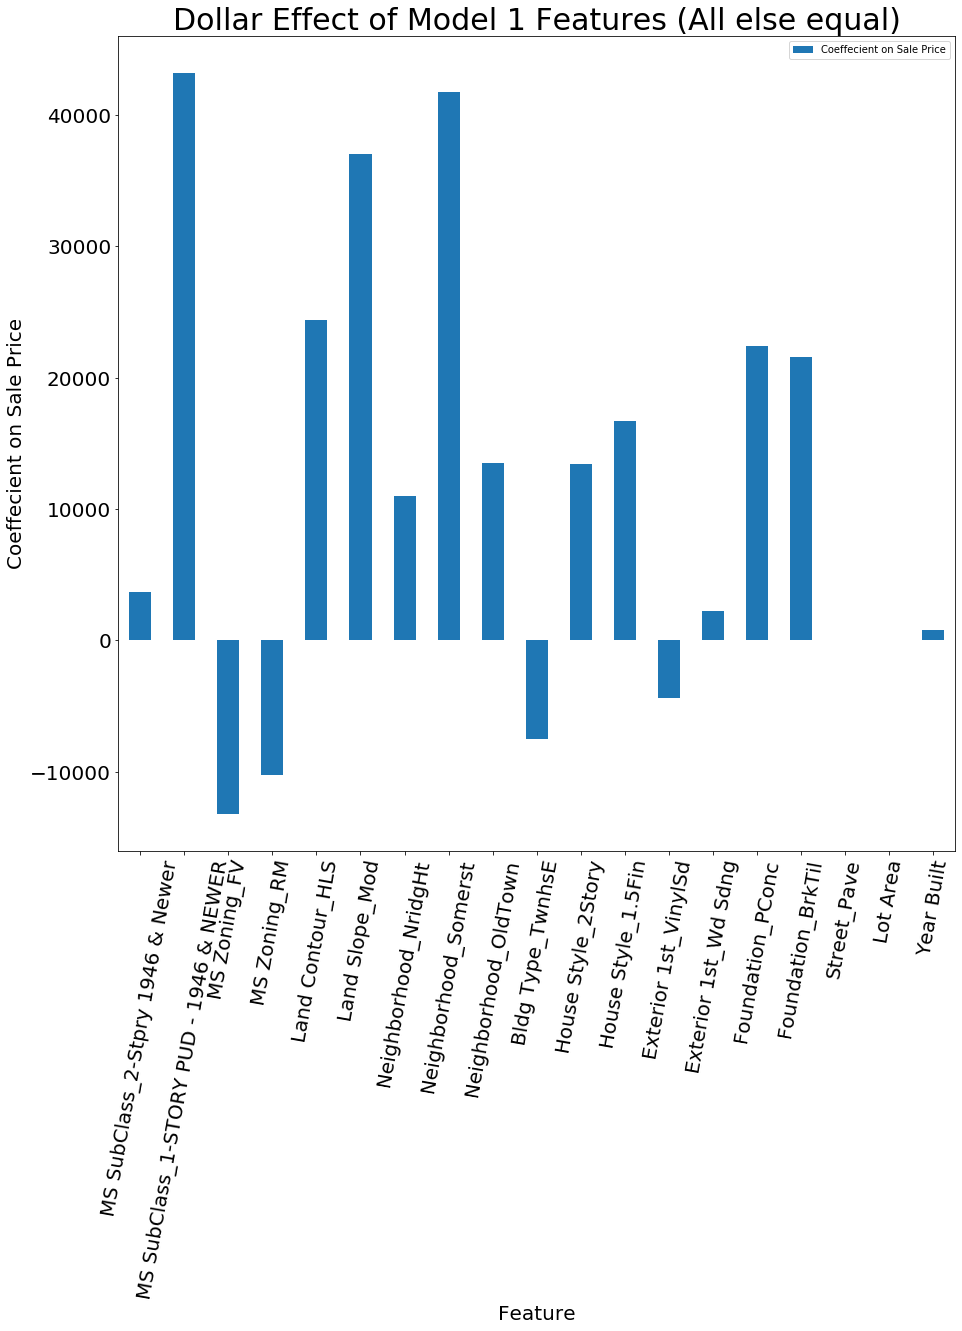

In [94]:
ax = model1_coeffecients.plot.bar(x='Feature', y='Coeffecient on Sale Price',
                                  figsize = (15,15),
                                  rot=-1000)

ax.set_xlabel('Feature', fontsize = 20)
ax.set_ylabel('Coeffecient on Sale Price', fontsize = 20)
plt.title("Dollar Effect of Model 1 Features (All else equal)", fontsize = 30)
plt.text(5, 1, print('The R-Squared value is '+ str(porchreg.rvalue)))
plt.tick_params(labelsize=20)
plt.show()




In [95]:
y_pred = lr1.predict(X1_train)

Citation: General Assembly, Global Lecture 3.01, Matt Brems

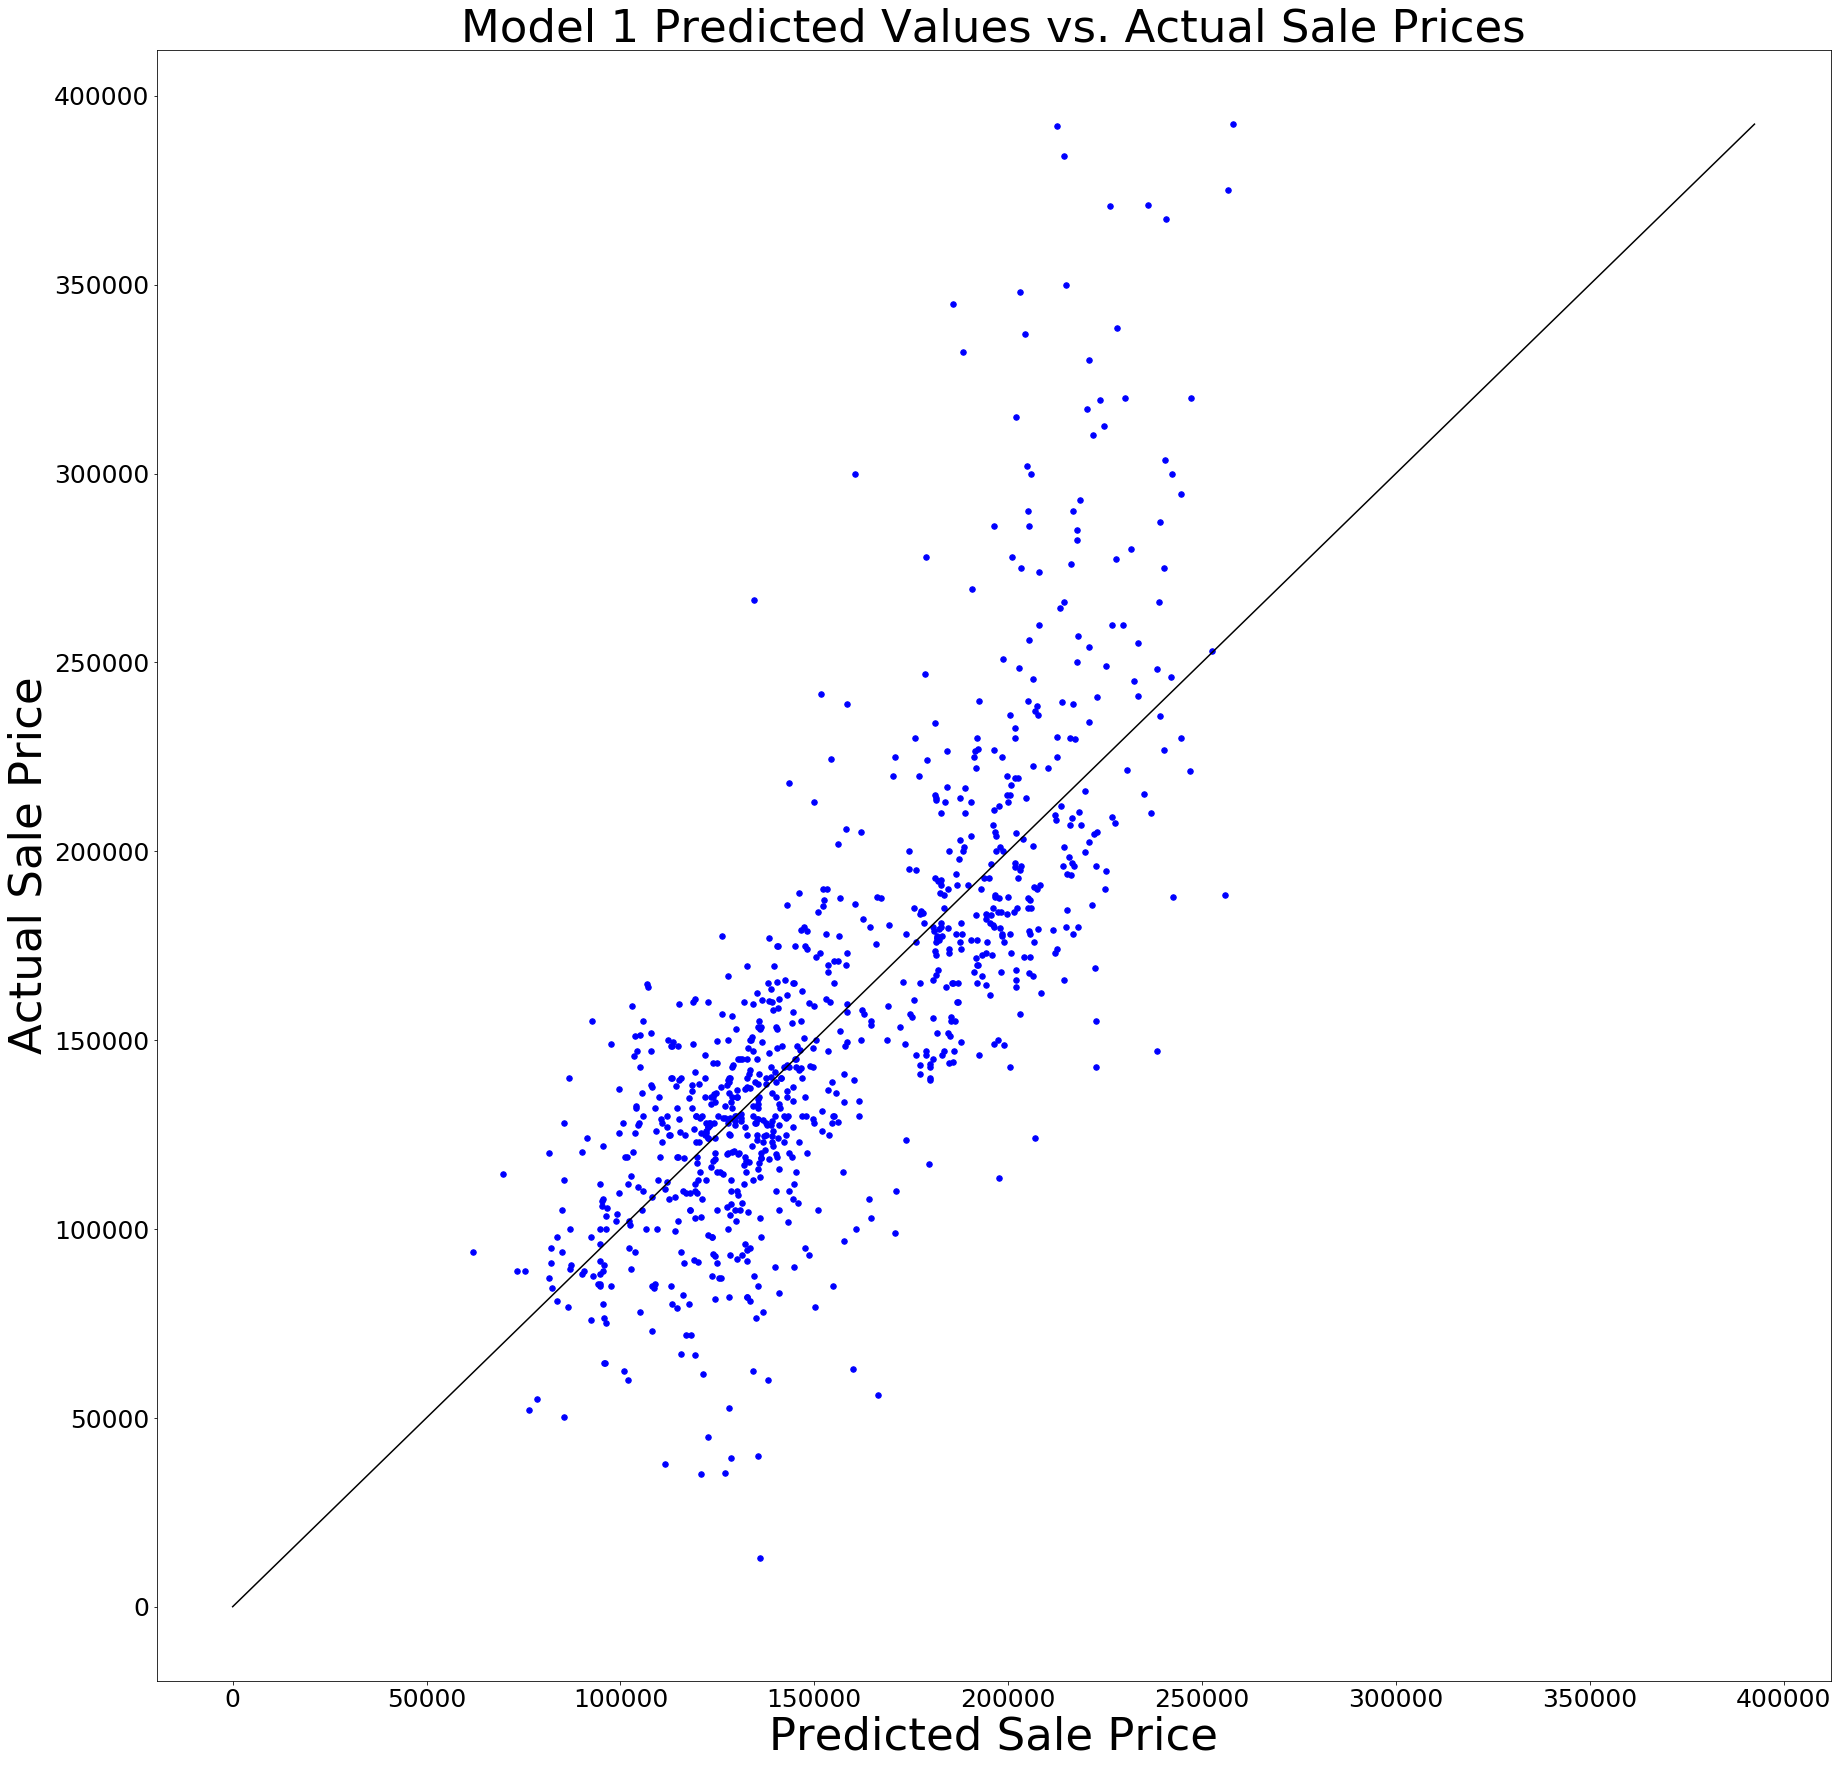

In [96]:
plt.figure(figsize=(30,30))
plt.scatter(y_pred, y_train1, s=30, color='blue')

# Plotting a line of best fit
plt.plot([0, np.max(y_train1)],
         [0, np.max(y_train1)],
         color = 'black')

plt.xlabel("Predicted Sale Price", fontsize = 45)
plt.ylabel("Actual Sale Price", fontsize = 45)
plt.title('Model 1 Predicted Values vs. Actual Sale Prices', fontsize = 45)
plt.tick_params(labelsize=25)

# Model 2

In [97]:
#Sree helped me with how to create a dictionary of coeffecients
model2_coeffecients = pd.DataFrame({'Features': X2.columns,
                                    'Coeffecient on Sale Price':lr2.coef_})

The R-Squared value is 0.3422743094293929


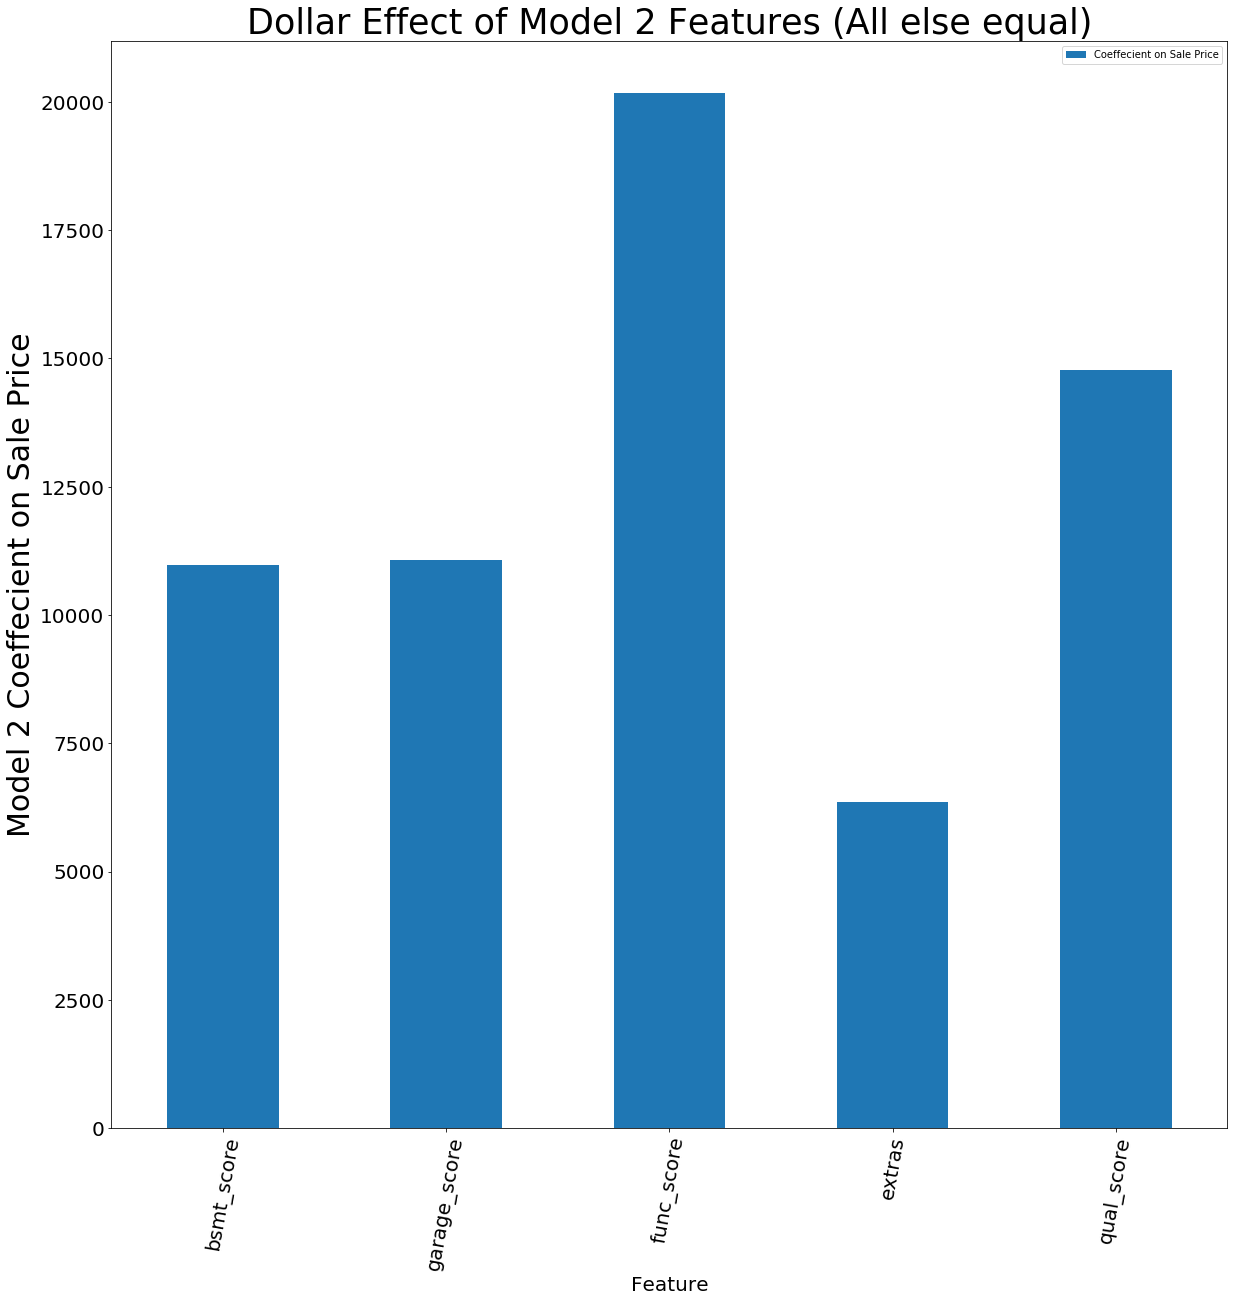

In [98]:
ax = model2_coeffecients.plot.bar(x='Features', y='Coeffecient on Sale Price',
                                  figsize = (20,20),rot=-1000)

ax.set_xlabel('Feature', fontsize = 20)
ax.set_ylabel('Model 2 Coeffecient on Sale Price', fontsize = 30)
plt.title("Dollar Effect of Model 2 Features (All else equal)", fontsize = 35)
plt.text(5, 1, print('The R-Squared value is '+ str(porchreg.rvalue)))
plt.tick_params(labelsize=20)
plt.show()



In [99]:
y_pred2 = lr2.predict(X2_ss_train)

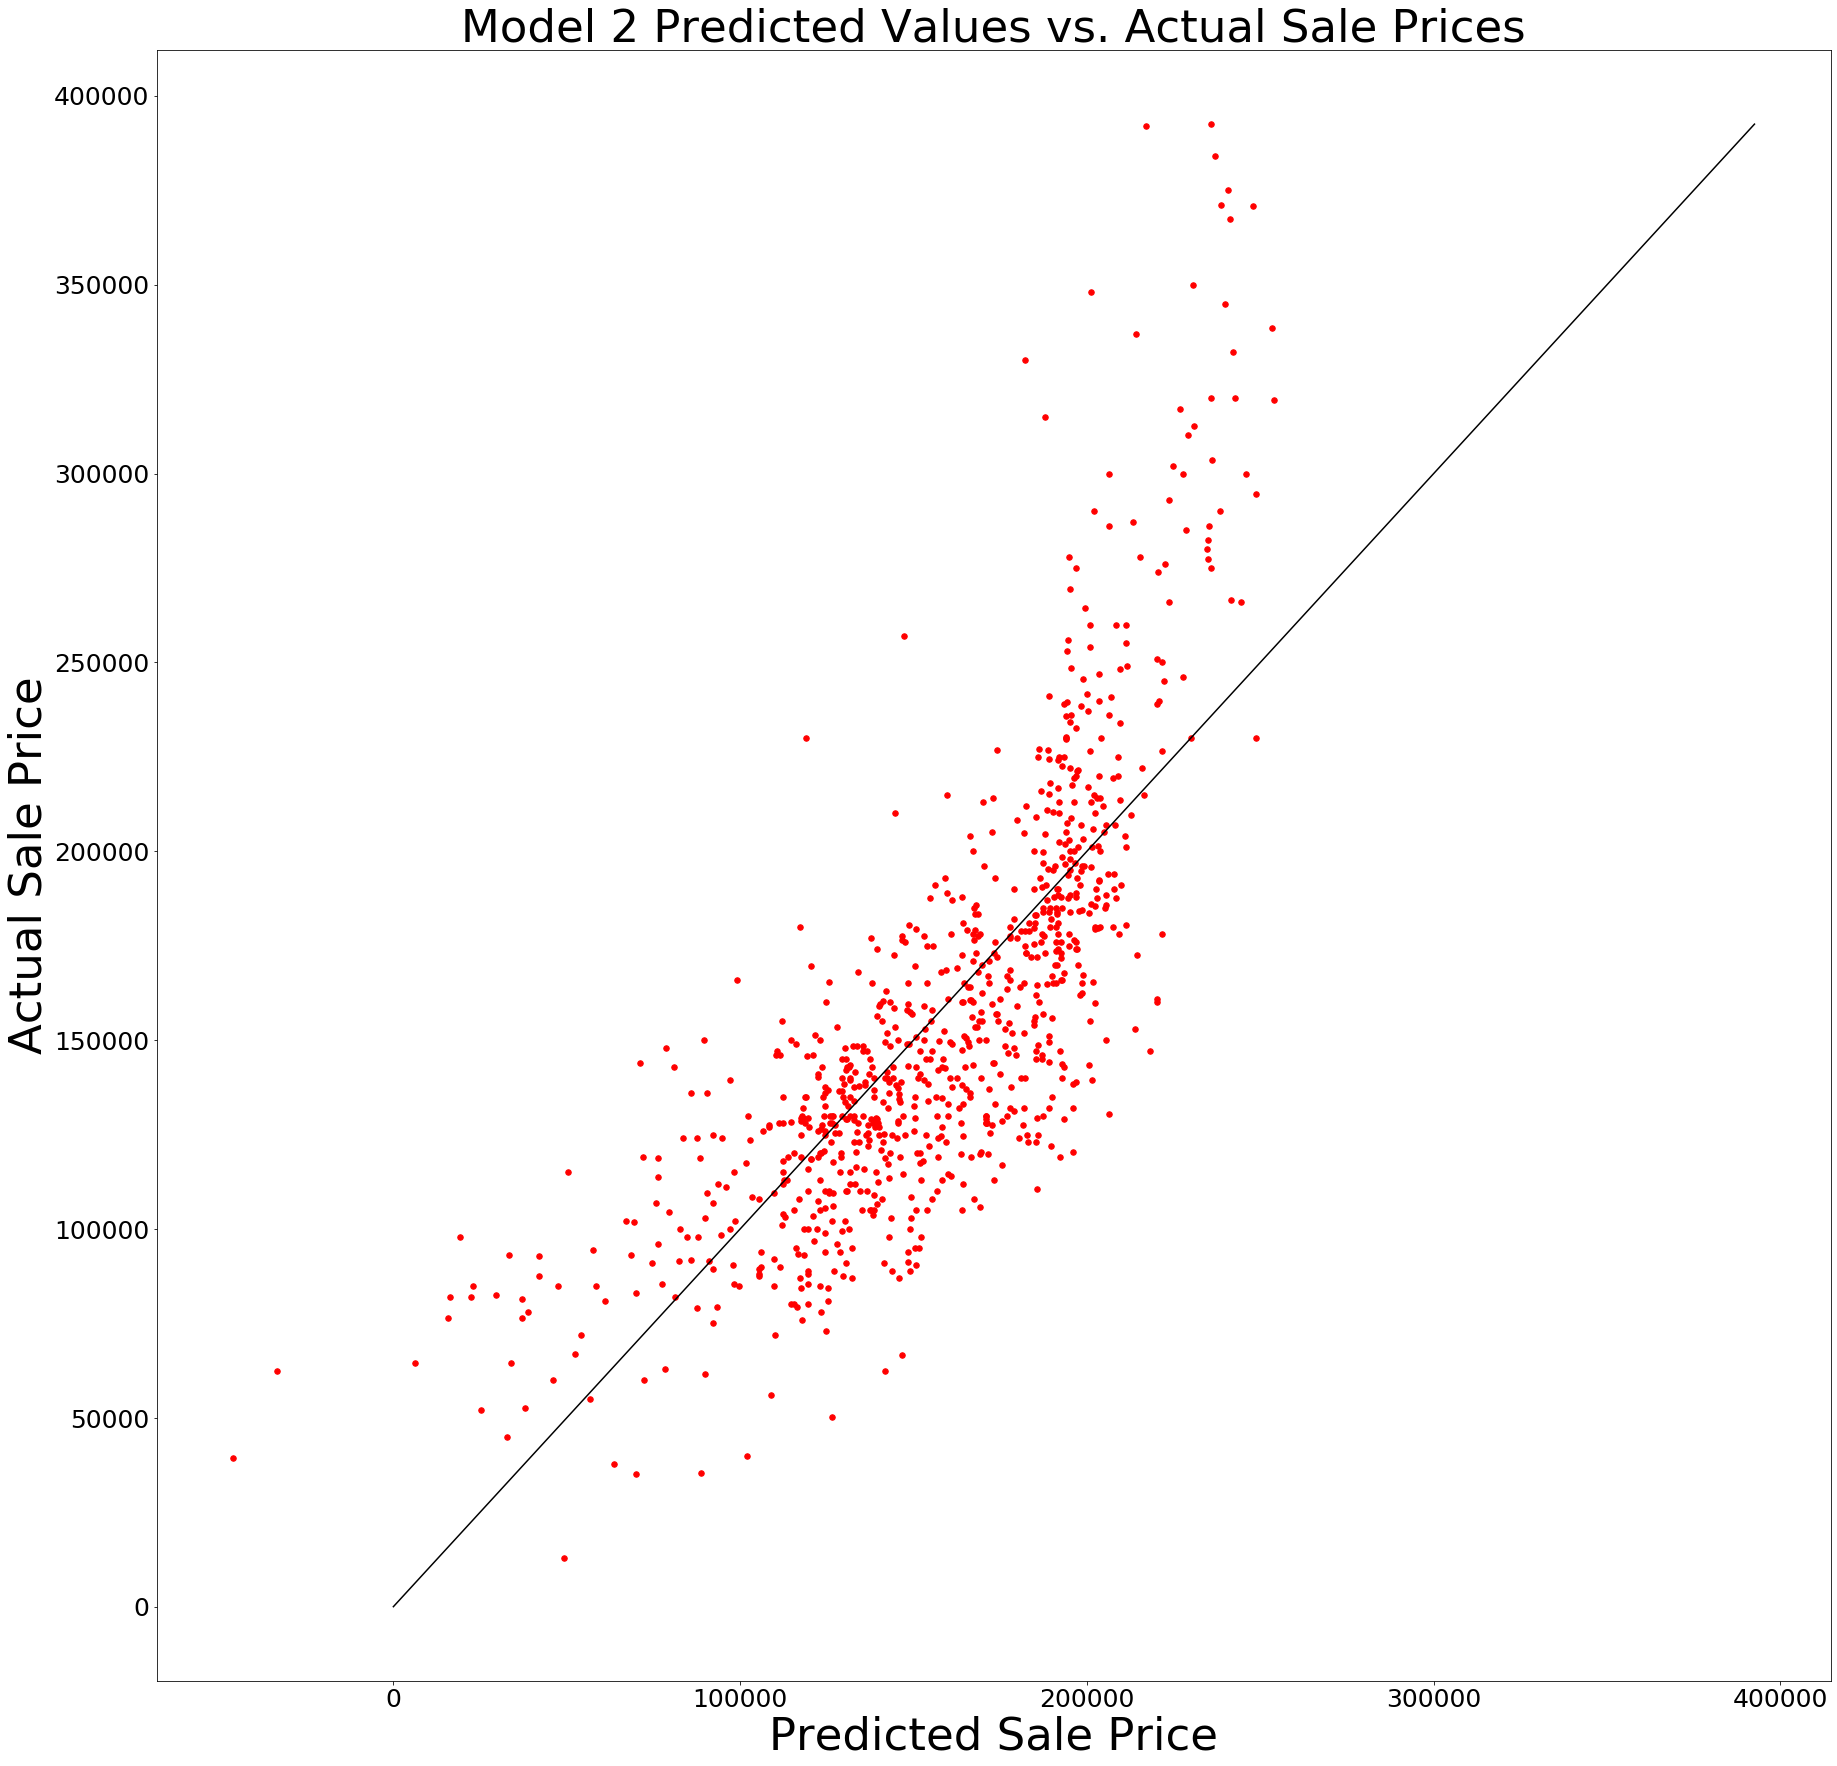

In [100]:
plt.figure(figsize=(30,30))
plt.scatter(y_pred2, y_train2, s=30, color='red')

# Plotting a line of best fit
plt.plot([0, np.max(y_train1)],
         [0, np.max(y_train1)],
         color = 'black')

plt.xlabel("Predicted Sale Price", fontsize = 45)
plt.ylabel("Actual Sale Price", fontsize = 45)
plt.title('Model 2 Predicted Values vs. Actual Sale Prices', fontsize = 45)
plt.tick_params(labelsize=25)

## Observations 

**Model 1**: Year built, Lot Area, and MS SubClass (Dwelling Type) had the highest positive effect on price for this model while 'Floating Village Residential' as a Zoning Type and Vinyl Exterior had the highest negative effect on price. Having a moderate land slope had close to no effect on price, likely because it was moderate, not something that causes people to make a decision regarding buying a house. 

**Model 2**: Functionality and Quality scores for Model 2 had the greatest effect on price while extras had the lowest effect on price.

**Residuals Analysis**: As expected from our differences in R-squared between train and test data for each model, Model 1 shows more variance around the best fit line than Model 2. In model 1 the residuals are more spread out, and tighter in model 2.


# 8) Conclusions <a id='conclusions'></a>

Based on our R squared and visualizations we believe the production model should be Model 2. It has significantly less variance while similar test R-squared across all regressions. More specifically the Ridge Regression offers the best regression as it has the least variance between the 3.

What our model is saying is that factors that the quality and functionality of a house, or features that can be remodelled and renovated matter slightly more for determining house prices in Ames, Iowa. We would advise that real estate investment firms choose the 'house flipping

# 9) Kaggle Submission

In [101]:
X_kaggle = df_test[model2_feat]

In [102]:
X_kaggle['SalePrice'] = lr2.predict(X_kaggle)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [103]:
X_kaggle.head()

bsmt_score  garage_score func_score  extras  qual_score     SalePrice
Id                                                                         
2658         6.0           3.0         17    1.72          19  8.904254e+05
2718         8.0           8.0         17    1.70          15  9.085331e+05
2414        11.0           8.0         20    2.24          19  1.064505e+06
1989         7.0           7.0         17    1.84          18  9.316703e+05
625          8.0           8.0         18    4.61          17  9.767484e+05

In [104]:
output = X_kaggle[['SalePrice']]

In [105]:
output.head()

SalePrice
Id                
2658  8.904254e+05
2718  9.085331e+05
2414  1.064505e+06
1989  9.316703e+05
625   9.767484e+05

In [106]:
output.to_csv('./datasets/first_submission.csv', index = True)

In [107]:
output.shape

(878, 1)